<div class="alert alert-block alert-success">
    
# FIT5196 Task 1 in Assessment 2
#### Student Name: Emmanuelle Christin; Phakhanan Rataphaibul
#### Student ID: 32941943; 33654735

Date: 15 May 2024


Environment: Python 3.10.12

Libraries used:

    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Task 1](#task1) <br>
$\;\;\;\;$[3.1. Load Data  ](#load) <br>
$\;\;\;\;$[3.2. Missing Data ](#miss_data) <br>
$\;\;\;\;\;\;\;\;\;$[3.2.1 Impute Branch Code](#missing_branch_code) <br>
$\;\;\;\;\;\;\;\;\;$[3.2.2 Impute Distance to Customer KM ](#missing_distance_to_customer_km) <br>
$\;\;\;\;\;\;\;\;\;$[3.2.3 Impute Delivery Fee and Validate for Missing Data Solution ](#missing_delivery_fee) <br>
$\;\;\;\;$[3.3. Dirty Data ](#Read) <br>
$\;\;\;\;\;\;\;\;\;$[3.3.1 Inconsistent Date Column](#dirty_date) <br>
$\;\;\;\;\;\;\;\;\;$[3.3.2 Incorrect Order Type](#dirty_order_type) <br>
$\;\;\;\;\;\;\;\;\;$[3.3.3 Inconsistent Branch Code](#dirty_branch_code) <br>
$\;\;\;\;\;\;\;\;\;$[3.3.4 Mismatched Menu](#dirty_menu) <br>
$\;\;\;\;\;\;\;\;\;$[3.3.5 Incorrect Order Price](#dirty_order_price) <br>
$\;\;\;\;\;\;\;\;\;$[3.3.6 Switched Latitude and Longitude](#dirty_lat_lon) <br>
$\;\;\;\;\;\;\;\;\;$[3.3.7 Incorrect Distance](#dirty_distance) <br>
$\;\;\;\;\;\;\;\;\;$[3.3.8 Mismatched Customer Loyalty Status](#dirty_loyalty) <br>
$\;\;\;\;\;\;\;\;\;$[3.3.9 Validation for Dirty Data Solution](#dirty_validation) <br>
$\;\;\;\;$[3.4. Outlier](#outlier) <br>
$\;\;\;\;\;\;\;\;\;$[3.4.1 Find the Outlier ](#find_outlier) <br>
$\;\;\;\;\;\;\;\;\;$[3.4.2 Remove Outlier and Validate the Outlier Solution](#remove_outlier) <br>
$\;\;\;\;$[3.5. Export to CSV](#export) <br>
[4. Task 2 ](#task2) <br>
$\;\;\;\;$[4.1. Load Data](#load_data_2) <br>
$\;\;\;\;$[4.2. Data Cleaning and Observation](#clean_data_observe) <br>
$\;\;\;\;$[4.3. Data Transformation/Normalisation](#transform) <br>
$\;\;\;\;$[4.4. Transformation/Normalization Effect Observation](#transform_effect) <br>
$\;\;\;\;$[4.5. Conclusion of Data Transformation/Normalization](#conclusion) <br>
[5. Summary](#summary) <br>
[6. References](#ref) <br>

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

### Overview

This assesment consists of two tasks.

### Task 1

Task One involves exploring and understanding the data as a critical part of the data wrangling process. The goal is to identify and correct data issues before proceeding to further data analysis and model building. You have been provided with three datasets along with three additional files: `branches.csv`, `edges.csv`, and `nodes.csv`. Due to an unexpected scenario, portions of the data are missing or contain anomalous values. The tasks required for this assessment are as follows:

### Key Tasks in Task 1:

1. **Detect and Fix Errors in `<group_id>_dirty_data.csv`**:
   - Examine the raw data to understand its structure and identify any errors or inconsistencies.
   - Use appropriate methods to detect and correct these errors, ensuring data consistency and correctness.

2. **Impute Missing Values in `<group_id>_missing_data.csv`**:
   - Focus on imputing the missing `delivery_fee` attribute.
   - Utilize suitable imputation techniques (e.g., mean, median, mode, or predictive modeling) to handle missing values.

3. **Detect and Remove Outlier Rows in `<group_id>_outlier_data.csv`**:
   - Identify and remove outliers with respect to the `delivery_fee` attribute.
   - Apply statistical methods to detect outliers (e.g., Z-score, IQR) and remove anomalous rows.

### Task 2

The goal of Task Two is to prepare the provided property and suburb-related data from `suburb_info.xlsx` for building a linear regression model. The focus is on exploring the data and applying various normalization and transformation techniques to six specific columns to ensure they are on the same scale and have a strong linear relationship with the target variable, `median_house_price`.

### Key Tasks in Task 2:

1. **Explore the Data**:
   - Load and examine the dataset to understand its structure and identify any potential issues.
   - Perform initial statistical analysis and visualizations to assess the distribution and relationships of the columns:
     - `number_of_houses`
     - `number_of_units`
     - `population`
     - `aus_born_perc`
     - `median_income`
     - `median_house_price`

2. **Evaluate the Need for Scaling and Transformation**:
   - Determine if scaling or transformations are necessary based on the initial exploration.
   - Justify the need for or against scaling/transformations.

3. **Apply Normalization/Transformation Techniques**:
   - Test different methods of scaling and transformation on the specified columns:
     - **Standardization**: Transforming data to have a mean of 0 and a standard deviation of 1.
     - **Min-Max Normalization**: Scaling data to a range between 0 and 1.
     - **Log Transformation**: Applying the logarithm to reduce skewness.
     - **Power Transformation**: Using techniques like the Box-Cox transformation to stabilize variance and make data more normally distributed.
     - **Box-Cox Transformation**: A specific power transformation method to stabilize variance.

4. **Compare and Document Results**:
   - Compare the effect of each transformation method on the data distribution and linear relationship with `median_house_price`.
   - Use visualizations and statistical measures to assess the impact.


## First, we connect google colab with google drive.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



<div class="alert alert-block alert-warning">

## 2.  Importing Libraries <a class="anchor" name="libs"></a>
    
</div>

The packages to be used in this assessment are imported in the following. They are used to fulfill the following tasks:


* **pandas**: Used for data manipulation and analysis.
* **numpy**: Used to support large, multi-dimensional arrays and matrices calculation.
* **networkx**: Used for the creation, manipulation, and study of complex networks.
* **sklearn.linear_model.LinearRegression**: Used for linear regression modeling.
* **datetime**: Supplies classes for manipulating dates and times.
* **sklearn.metrics.r2_score**: Used to compute the R-squared score for regression models.
* **sklearn.model_selection.train_test_split**: Splits the dataset into training and testing sets.
* **scipy.stats**: Contains functions for statistical computations.
* **matplotlib.pyplot**: Used for creating visualizations.
* **seaborn**: Provides a high-level interface for graphics.
* **sklearn.preprocessing.StandardScaler**: Standardizes features by removing the mean and scaling to unit variance.
* **sklearn.preprocessing.MinMaxScaler**: Transforms features by scaling each feature to a given range.
* **sklearn.preprocessing.PowerTransformer**: Applies power transformations to make data more Gaussian-like.
* **scipy.stats.boxcox**: Transforms data using the Box-Cox power transformation.

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.linear_model import LinearRegression
import datetime
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import scipy.stats as stats

<div class="alert alert-block alert-warning">

## 3.  Task 1 <a class="anchor" name="task1"></a>
    
</div>

<div class="alert alert-block alert-info">
    
### 3.1 Load Data <a class="anchor" name="latin"></a>

First, we load 5 CSV files to 5 dataframe.

In [ ]:
# Read CSV from Drive
dirty_data = pd.read_csv('/content/drive/Shareddrives/FIT5196_S1_2024/A2/student_data/Group005_dirty_data.csv')
missing_data = pd.read_csv('/content/drive/Shareddrives/FIT5196_S1_2024/A2/student_data/Group005_missing_data.csv')
outlier_data = pd.read_csv('/content/drive/Shareddrives/FIT5196_S1_2024/A2/student_data/Group005_outlier_data.csv')
branches_df = pd.read_csv('/content/drive/Shareddrives/FIT5196_S1_2024/A2/supplementary_data/branches.csv')
edges_df= pd.read_csv('/content/drive/Shareddrives/FIT5196_S1_2024/A2/supplementary_data/edges.csv')
nodes_df= pd.read_csv('/content/drive/Shareddrives/FIT5196_S1_2024/A2/supplementary_data/nodes.csv')

### For Linear Regression Parameter





---

To build a Linear Regression Model, our target variable, the delivery fee, depends linearly on:

a. Whether it is a weekend or weekday (1 or 0) - as a continuous variable.

b. The time of day (morning: 0, afternoon: 1, evening: 2) - as a continuous variable.

c. The distance between the branch and the customer.

Based on these factors, we will prepare functions to:
1. Check whether a given date is a weekday or weekend.
2. Categorize the given time into morning, afternoon, or evening.

---

In [ ]:
def check_weekday(date_str):
    # Split the date string into year, month, and day
    year, month, day = map(int, date_str.split('-'))
    # Create a date object from the given year, month, and day
    date_obj = datetime.date(year, month, day)
    # Return 1 if the date is a weekend, otherwise 0
    return 1 if date_obj.weekday() >= 5 else 0

def categorize_time_of_day(order_time):
    # Convert the order_time to a datetime object
    time = pd.to_datetime(order_time).time()

    if time >= pd.to_datetime('08:00:00').time() and time <= pd.to_datetime('12:00:00').time():
        return 0  # Morning
    elif time >= pd.to_datetime('12:00:01').time() and time <= pd.to_datetime('16:00:00').time():
        return 1  # Afternoon
    elif time >= pd.to_datetime('16:00:01').time() and time <= pd.to_datetime('20:00:00').time():
        return 2  # Evening

<div class="alert alert-block alert-info">
    
### 3.2 Missing Data <a class="anchor" name="miss"></a>

To begin analysing the `missing_data` DataFrame, first  we use the `.info()` method to get a summary of its structure. Then, use the `.head()` method to print the first few rows of the DataFrame for a quick preview.

In [ ]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 500 non-null    object 
 1   date                     500 non-null    object 
 2   time                     500 non-null    object 
 3   order_type               500 non-null    object 
 4   branch_code              400 non-null    object 
 5   order_items              500 non-null    object 
 6   order_price              500 non-null    float64
 7   customer_lat             500 non-null    float64
 8   customer_lon             500 non-null    float64
 9   customerHasloyalty?      500 non-null    int64  
 10  distance_to_customer_KM  450 non-null    float64
 11  delivery_fee             450 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [ ]:
missing_data.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDB01139,2018-04-15,11:22:49,Breakfast,TP,"[('Cereal', 7), ('Coffee', 4)]",177.0,-37.816611,144.986715,0,9.488,13.167683
1,ORDJ06783,2018-01-21,08:30:25,Breakfast,NaN,"[('Pancake', 6), ('Coffee', 8), ('Eggs', 2)]",249.5,-37.800116,144.971195,0,NaN,14.776037
2,ORDA06924,2018-03-02,09:51:32,Breakfast,BK,"[('Coffee', 8), ('Eggs', 9), ('Pancake', 2), (...",453.5,-37.818538,144.991194,0,5.636,10.075048
3,ORDZ10811,2018-12-31,20:00:00,Dinner,NS,"[('Pasta', 7), ('Salmon', 9), ('Fish&Chips', 4)]",701.5,-37.805867,144.999458,0,10.133,16.040253
4,ORDB01235,2018-08-08,15:16:03,Lunch,TP,"[('Salad', 3), ('Chicken', 2), ('Steak', 5), (...",364.6,-37.811808,144.955777,0,8.717,12.434995


After checking a quick preview of the DataFrame, we use the `.isnull().sum()` method to detect the number of null values in each column. This helps us decide which columns need imputation to handle the missing data.

In [ ]:
null_values = missing_data.isnull().sum()

print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
order_id                     0
date                         0
time                         0
order_type                   0
branch_code                100
order_items                  0
order_price                  0
customer_lat                 0
customer_lon                 0
customerHasloyalty?          0
distance_to_customer_KM     50
delivery_fee                50
dtype: int64


From the output below, we can see that there are three columns that need to be imputed: `branch_code`, `distance_to_customer_KM`, and `delivery_fee`. The next subsection will discuss our approach to imputing these missing values.

<div class="alert alert-block alert-info">
    
#### 3.2.1 Impute Branch Code<a class="anchor" name="missing_branch_code"></a>

In this section , we try to impute `branch_code`. The `branch_code` column contains missing values that can be imputed using a specific pattern observed in the `order_id` column. We called this case as **Missing at Random (MAR)** because the missing values can be explained and imputed based on another observed variable (`order_id`).

Each `order_id` has a specific pattern where the 4th character represents the branch code. By extracting the 4th character from each `order_id`, we can determine the branch code for the corresponding entry.

Steps to Impute Missing `branch_code` Values:

1. **Extract the Branch Code from `order_id`**:
   - For each `order_id`, extract the 4th character, which corresponds to the branch code and store in variable char_to_branch.

2. **Impute Missing Values**:
   - Use the reference variable to fill in the missing values in the `branch_code` column.


We first identify rows in the `missing_data` DataFrame where the `branch_code` is null.

In [ ]:
missing_branch_data = missing_data[(missing_data['branch_code'].isnull())]

print("Rows with missing branch code :")
missing_branch_data.head(10)

Rows with missing branch code :


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
1,ORDJ06783,2018-01-21,08:30:25,Breakfast,NaN,"[('Pancake', 6), ('Coffee', 8), ('Eggs', 2)]",249.5,-37.800116,144.971195,0,NaN,14.776037
10,ORDB00586,2018-02-20,09:41:24,Breakfast,NaN,"[('Pancake', 10), ('Eggs', 3), ('Coffee', 6), ...",542.5,-37.806168,144.958423,0,NaN,11.361986
15,ORDA05392,2018-10-13,17:27:53,Dinner,NaN,"[('Shrimp', 1), ('Pasta', 8), ('Salmon', 1)]",315.0,-37.820713,144.956802,0,8.438,18.170220
18,ORDX02981,2018-08-24,15:46:28,Lunch,NaN,"[('Steak', 4), ('Chicken', 9), ('Fries', 5), (...",979.0,-37.807960,144.975468,0,6.334,12.343039
22,ORDC06927,2018-01-01,08:00:00,Breakfast,NaN,"[('Eggs', 7), ('Coffee', 7), ('Cereal', 7), ('...",402.0,-37.807094,144.955978,1,8.151,6.502523
23,ORDC06118,2018-12-17,19:39:43,Dinner,NaN,"[('Fish&Chips', 4), ('Shrimp', 3), ('Pasta', 4)]",412.0,-37.806403,144.955473,0,NaN,14.318239
31,ORDJ01950,2018-08-29,15:56:37,Lunch,NaN,"[('Steak', 7), ('Fries', 10), ('Chicken', 3), ...",565.4,-37.811868,144.956500,0,8.632,12.306008
33,ORDZ03276,2018-09-17,16:37:10,Dinner,NaN,"[('Fish&Chips', 10), ('Salmon', 6), ('Pasta', ...",1166.5,-37.824575,144.943135,0,10.612,17.117660
51,ORDB06310,2018-06-19,13:34:38,Lunch,NaN,"[('Salad', 2), ('Fries', 6), ('Chicken', 2)]",170.4,-37.799903,144.927629,0,11.671,14.258138
53,ORDZ00642,2018-11-15,18:28:43,Dinner,NaN,"[('Fish&Chips', 8), ('Pasta', 3), ('Salmon', 2...",930.5,-37.801226,144.953193,0,7.737,13.708588


In this code below, we are grouping rows based on 'branch_code' and extracting the fourth character from the 'order_id' of each row in these groups. The resulting  stored in `char_to_branch`.

In [ ]:
branch_groups = {}
char_to_branch = {}

# Group by 'branch_code' and process each group
for branch_code, group in outlier_data.groupby('branch_code'):
    chars_set = set()

    # Iterate over the group rows
    for order_id in group['order_id']:
        if isinstance(order_id, str) and len(order_id) >= 5:
            char_index_4 = order_id[3]  # Extract the fourth character
            chars_set.add(char_index_4)

            if char_index_4 not in char_to_branch:
                char_to_branch[char_index_4] = []
            if branch_code not in char_to_branch[char_index_4]:
                char_to_branch[char_index_4].append(branch_code)

    branch_groups[branch_code] = chars_set

# Print the mapping
print("Character to Branch Mapping:")
for char, branches in char_to_branch.items():
    print(f"Character {char}: {branches}")

Character to Branch Mapping:
Character A: ['BK']
Character K: ['BK']
Character X: ['BK']
Character I: ['NS']
Character Z: ['NS']
Character C: ['NS']
Character Y: ['TP']
Character J: ['TP']
Character B: ['TP']


Based on that branch mapping, we prepare a function `impute_branch_code`.
We takes an `order_id` and returns the corresponding `branch_code` based on the fourth character of the `order_id`.

In [ ]:
def impute_branch_code(order_id):
    # Check if order_id is a string and has at least 5 characters
    if isinstance(order_id, str) and len(order_id) >= 5:
        # Extract the fourth character from order_id
        char_index_4 = order_id[3]
        # Check if the extracted character is in the char_to_branch mapping
        if char_index_4 in char_to_branch:
            # Return the first branch_code associated with this character
            return char_to_branch[char_index_4][0]
    return np.nan

In [ ]:
# Identify rows where branch_code is missing
mask_1 = missing_data.loc[(missing_data['branch_code'].isnull())]

# Apply the impute_branch_code function to impute missing branch_code values to missing_data dataframe
missing_data.loc[mask_1.index, 'branch_code'] = missing_data.loc[mask_1.index].apply(
    lambda row: impute_branch_code(row['order_id']),
    axis=1
)

After imputing the missing values, we check the first 10 rows to verify the imputation.

In [ ]:
# Display first 10 rows
missing_data.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDB01139,2018-04-15,11:22:49,Breakfast,TP,"[('Cereal', 7), ('Coffee', 4)]",177.00,-37.816611,144.986715,0,9.488,13.167683
1,ORDJ06783,2018-01-21,08:30:25,Breakfast,TP,"[('Pancake', 6), ('Coffee', 8), ('Eggs', 2)]",249.50,-37.800116,144.971195,0,NaN,14.776037
2,ORDA06924,2018-03-02,09:51:32,Breakfast,BK,"[('Coffee', 8), ('Eggs', 9), ('Pancake', 2), (...",453.50,-37.818538,144.991194,0,5.636,10.075048
3,ORDZ10811,2018-12-31,20:00:00,Dinner,NS,"[('Pasta', 7), ('Salmon', 9), ('Fish&Chips', 4)]",701.50,-37.805867,144.999458,0,10.133,16.040253
4,ORDB01235,2018-08-08,15:16:03,Lunch,TP,"[('Salad', 3), ('Chicken', 2), ('Steak', 5), (...",364.60,-37.811808,144.955777,0,8.717,12.434995
5,ORDK02444,2018-12-01,19:09:17,Dinner,BK,"[('Pasta', 8), ('Shrimp', 2)]",328.00,-37.818670,144.966497,0,7.676,17.529172
6,ORDA08315,2018-01-30,08:50:42,Breakfast,BK,"[('Pancake', 4), ('Eggs', 4), ('Coffee', 5), (...",411.50,-37.806851,144.974657,0,6.709,11.417807
7,ORDK02750,2018-01-12,08:20:16,Breakfast,BK,"[('Pancake', 5), ('Coffee', 3)]",143.75,-37.798971,144.970709,1,7.689,6.475532
8,ORDK09991,2018-01-01,08:00:00,Breakfast,BK,"[('Cereal', 8), ('Coffee', 1), ('Pancake', 10)...",594.00,-37.804171,144.958459,1,7.922,6.599585
9,ORDK04229,2018-10-18,17:38:01,Dinner,BK,"[('Pasta', 7), ('Fish&Chips', 5)]",367.50,-37.818658,144.967025,0,7.598,14.295005


<div class="alert alert-block alert-info">
    
#### 3.2.2 Impute distance_to_customer_KM <a class="anchor" name="missing_distance_to_customer_km"></a>

In this section, we want to impute `distance_to_customer_KM`, which is also missing at random because it is related to `branch_code`. The missingness is considered random as it depends on the `branch_code`.To impute the `distance_to_customer_KM` , we calculate shortest distance of customer location and branch code using Dijkstra's algorithm.

To impute distance_to_customer_KM we follow these steps:

1. **Prepare the Graph:**
   - Join `nodes_df` with `branches_df` to get branch nodes.
   - Join `nodes_df` with `customers_df` (from `missing_data`) to get customer nodes.
   - Use these nodes to construct a graph representing the network.

2. **Define Imputation Functions:**
   - **impute_distance:** This function calculates the shortest path from a customer node to each branch node using NetworkX.

3. **Impute Missing Data:**
   - Use `impute_distance` for each data with missing `distance_to_customer_KM`.


In [ ]:
# Rename the latitude and longitude columns in nodes_df
nodes_cust_df = nodes_df.rename(columns={'lat': 'customer_lat', 'lon': 'customer_lon'})

# Merge customers_df with nodes_cust_df
merged_cust_df = pd.merge(missing_data, nodes_cust_df, on=['customer_lat', 'customer_lon'], how='left')

# Add the customer_node to the customers_df DataFrame
missing_data['customer_node'] = merged_cust_df['node']

# Display the first 10 rows
missing_data.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,customer_node
0,ORDB01139,2018-04-15,11:22:49,Breakfast,TP,"[('Cereal', 7), ('Coffee', 4)]",177.00,-37.816611,144.986715,0,9.488,13.167683,1445498747
1,ORDJ06783,2018-01-21,08:30:25,Breakfast,TP,"[('Pancake', 6), ('Coffee', 8), ('Eggs', 2)]",249.50,-37.800116,144.971195,0,NaN,14.776037,3208518270
2,ORDA06924,2018-03-02,09:51:32,Breakfast,BK,"[('Coffee', 8), ('Eggs', 9), ('Pancake', 2), (...",453.50,-37.818538,144.991194,0,5.636,10.075048,4313862244
3,ORDZ10811,2018-12-31,20:00:00,Dinner,NS,"[('Pasta', 7), ('Salmon', 9), ('Fish&Chips', 4)]",701.50,-37.805867,144.999458,0,10.133,16.040253,207093467
4,ORDB01235,2018-08-08,15:16:03,Lunch,TP,"[('Salad', 3), ('Chicken', 2), ('Steak', 5), (...",364.60,-37.811808,144.955777,0,8.717,12.434995,387266371
5,ORDK02444,2018-12-01,19:09:17,Dinner,BK,"[('Pasta', 8), ('Shrimp', 2)]",328.00,-37.818670,144.966497,0,7.676,17.529172,638049332
6,ORDA08315,2018-01-30,08:50:42,Breakfast,BK,"[('Pancake', 4), ('Eggs', 4), ('Coffee', 5), (...",411.50,-37.806851,144.974657,0,6.709,11.417807,2810324702
7,ORDK02750,2018-01-12,08:20:16,Breakfast,BK,"[('Pancake', 5), ('Coffee', 3)]",143.75,-37.798971,144.970709,1,7.689,6.475532,1367608941
8,ORDK09991,2018-01-01,08:00:00,Breakfast,BK,"[('Cereal', 8), ('Coffee', 1), ('Pancake', 10)...",594.00,-37.804171,144.958459,1,7.922,6.599585,775946941
9,ORDK04229,2018-10-18,17:38:01,Dinner,BK,"[('Pasta', 7), ('Fish&Chips', 5)]",367.50,-37.818658,144.967025,0,7.598,14.295005,294622368


In [ ]:
# Rename the latitude and longitude columns in nodes_df
nodes_bran_df = nodes_df.rename(columns = {'lat': 'branch_lat', 'lon': 'branch_lon'})

# Merge branches_df with nodes_bran_df to associate branch locations with network nodes
merged_df = pd.merge(branches_df, nodes_bran_df, on = ['branch_lat', 'branch_lon'], how = 'left')

# Add the branch_node information to the branches_df DataFrame
branches_df['branch_node'] = merged_df['node']

# Display the first 10 rows
branches_df.head()

,branch_code,branch_name,branch_lat,branch_lon,branch_node
0,NS,Nickolson,-37.773803,144.983647,2455254505
1,TP,Thompson,-37.861835,144.905716,1390575046
2,BK,Bakers,-37.815834,145.046450,1889485053


In [ ]:
# Create a graph using networkx
G = nx.Graph()

# Iterate through each row in the edges_df
for index, row in edges_df.iterrows():
    # Add an edge to the graph G with nodes u and v and weight attribute to distance(m)
    G.add_edge(row['u'], row['v'], weight=row['distance(m)'])

In [ ]:
def impute_distance(customer_node, branch_code):
    try:
        # Get the branch node corresponding to the provided branch_code
        branch_node = branches_df.loc[branches_df['branch_code'] == branch_code, 'branch_node'].values[0]

        # Use Dijkstra's algorithm to calculate the shortest path distance
        distance = (nx.shortest_path_length(G, source=customer_node, target=branch_node, weight='weight')) / 1000
        return distance
    except nx.NetworkXNoPath:
        print(f"No path between customer node {customer_node} and branch node {branch_node}")
        return float('inf')  # Return infinity if no path exists
    except IndexError:
        print(f"Branch code {branch_code} not found.") # Return infinity if no branch exists
        return float('inf')

In [ ]:
# Identify rows where distance_to_customer_KM is missing
mask_2 = missing_data.loc[missing_data['distance_to_customer_KM'].isna()]

# Apply the impute_distance function to impute missing distance_to_customer_KM values to missing_data dataframe
missing_data.loc[mask_2.index, 'distance_to_customer_KM'] = missing_data.loc[mask_2.index].apply(
    lambda row: impute_distance(row['customer_node'], row['branch_code']) if pd.isna(row['distance_to_customer_KM']) else row['distance_to_customer_KM'],
    axis=1
)

After imputing the missing values, we drop column `customer_node` because we don't need it anymore. We also print the first 10 rows to verify the imputation.

In [ ]:
# Drop the 'customer_node' column from customers_df
imputed_missing_df = missing_data.drop(columns=['customer_node'], axis = 1)

# Display the first 10 rows of the resulting DataFrame to verify the changes
imputed_missing_df.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDB01139,2018-04-15,11:22:49,Breakfast,TP,"[('Cereal', 7), ('Coffee', 4)]",177.00,-37.816611,144.986715,0,9.488,13.167683
1,ORDJ06783,2018-01-21,08:30:25,Breakfast,TP,"[('Pancake', 6), ('Coffee', 8), ('Eggs', 2)]",249.50,-37.800116,144.971195,0,10.056,14.776037
2,ORDA06924,2018-03-02,09:51:32,Breakfast,BK,"[('Coffee', 8), ('Eggs', 9), ('Pancake', 2), (...",453.50,-37.818538,144.991194,0,5.636,10.075048
3,ORDZ10811,2018-12-31,20:00:00,Dinner,NS,"[('Pasta', 7), ('Salmon', 9), ('Fish&Chips', 4)]",701.50,-37.805867,144.999458,0,10.133,16.040253
4,ORDB01235,2018-08-08,15:16:03,Lunch,TP,"[('Salad', 3), ('Chicken', 2), ('Steak', 5), (...",364.60,-37.811808,144.955777,0,8.717,12.434995
5,ORDK02444,2018-12-01,19:09:17,Dinner,BK,"[('Pasta', 8), ('Shrimp', 2)]",328.00,-37.818670,144.966497,0,7.676,17.529172
6,ORDA08315,2018-01-30,08:50:42,Breakfast,BK,"[('Pancake', 4), ('Eggs', 4), ('Coffee', 5), (...",411.50,-37.806851,144.974657,0,6.709,11.417807
7,ORDK02750,2018-01-12,08:20:16,Breakfast,BK,"[('Pancake', 5), ('Coffee', 3)]",143.75,-37.798971,144.970709,1,7.689,6.475532
8,ORDK09991,2018-01-01,08:00:00,Breakfast,BK,"[('Cereal', 8), ('Coffee', 1), ('Pancake', 10)...",594.00,-37.804171,144.958459,1,7.922,6.599585
9,ORDK04229,2018-10-18,17:38:01,Dinner,BK,"[('Pasta', 7), ('Fish&Chips', 5)]",367.50,-37.818658,144.967025,0,7.598,14.295005


<div class="alert alert-block alert-info">
    
#### 3.2.3 Impute Delivery Fee and Validate Our Imputation <a class="anchor" name="missing_delivery_fee"></a>

In this section, we will impute the delivery fee using linear regression. The missing values are considered missing at random because the absence of data is related to observable variables. We choose linear regression for imputation because it allows us to predict the missing delivery fees based on the relationships between the delivery fee and other relevant variables. To predict the delivery fee, we will use three variables:

1. Weekend or weekday (1 or 0).
2. Time of the day (morning 0, afternoon 1, evening 2).
3. Distance between branch and customer.



In this code below, we calculate the full delivery fee for loyal customers.The full delivery fee here means delivery fee without a discount of 50%.
The reason we do this is because the linear regression that we will use doesn't know which customer that has a loyalty.

In [ ]:
# Function to prepare dataset for linear regression
def get_full_delivery_fee(row):
    # Calculate the full fee in new column
    if row['customerHasloyalty?'] == 1:
      full_fee = row['delivery_fee'] / 0.5
    else:
      full_fee = row['delivery_fee']

    return full_fee

imputed_missing_df['full_fee'] = imputed_missing_df.apply(get_full_delivery_fee, axis = 1) # prepare dataset

imputed_missing_df.head() # check entry

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,full_fee
0,ORDB01139,2018-04-15,11:22:49,Breakfast,TP,"[('Cereal', 7), ('Coffee', 4)]",177.0,-37.816611,144.986715,0,9.488,13.167683,13.167683
1,ORDJ06783,2018-01-21,08:30:25,Breakfast,TP,"[('Pancake', 6), ('Coffee', 8), ('Eggs', 2)]",249.5,-37.800116,144.971195,0,10.056,14.776037,14.776037
2,ORDA06924,2018-03-02,09:51:32,Breakfast,BK,"[('Coffee', 8), ('Eggs', 9), ('Pancake', 2), (...",453.5,-37.818538,144.991194,0,5.636,10.075048,10.075048
3,ORDZ10811,2018-12-31,20:00:00,Dinner,NS,"[('Pasta', 7), ('Salmon', 9), ('Fish&Chips', 4)]",701.5,-37.805867,144.999458,0,10.133,16.040253,16.040253
4,ORDB01235,2018-08-08,15:16:03,Lunch,TP,"[('Salad', 3), ('Chicken', 2), ('Steak', 5), (...",364.6,-37.811808,144.955777,0,8.717,12.434995,12.434995



Since we don't have the `weekend` and `time_of_day` columns, we will first create these columns using the `check_weekday` and `categorize_time_of_day` functions.

In [ ]:
# Create the weekend column by applying the check_weekday function to the date column
imputed_missing_df['weekend'] = imputed_missing_df['date'].apply(check_weekday)

# Create the time_of_day column by applying the categorize_time_of_day function to the time column
imputed_missing_df['time_of_day'] = imputed_missing_df['time'].apply(categorize_time_of_day)

# Display the first 10 rows
imputed_missing_df.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,full_fee,weekend,time_of_day
0,ORDB01139,2018-04-15,11:22:49,Breakfast,TP,"[('Cereal', 7), ('Coffee', 4)]",177.00,-37.816611,144.986715,0,9.488,13.167683,13.167683,1,0
1,ORDJ06783,2018-01-21,08:30:25,Breakfast,TP,"[('Pancake', 6), ('Coffee', 8), ('Eggs', 2)]",249.50,-37.800116,144.971195,0,10.056,14.776037,14.776037,1,0
2,ORDA06924,2018-03-02,09:51:32,Breakfast,BK,"[('Coffee', 8), ('Eggs', 9), ('Pancake', 2), (...",453.50,-37.818538,144.991194,0,5.636,10.075048,10.075048,0,0
3,ORDZ10811,2018-12-31,20:00:00,Dinner,NS,"[('Pasta', 7), ('Salmon', 9), ('Fish&Chips', 4)]",701.50,-37.805867,144.999458,0,10.133,16.040253,16.040253,0,2
4,ORDB01235,2018-08-08,15:16:03,Lunch,TP,"[('Salad', 3), ('Chicken', 2), ('Steak', 5), (...",364.60,-37.811808,144.955777,0,8.717,12.434995,12.434995,0,1
5,ORDK02444,2018-12-01,19:09:17,Dinner,BK,"[('Pasta', 8), ('Shrimp', 2)]",328.00,-37.818670,144.966497,0,7.676,17.529172,17.529172,1,2
6,ORDA08315,2018-01-30,08:50:42,Breakfast,BK,"[('Pancake', 4), ('Eggs', 4), ('Coffee', 5), (...",411.50,-37.806851,144.974657,0,6.709,11.417807,11.417807,0,0
7,ORDK02750,2018-01-12,08:20:16,Breakfast,BK,"[('Pancake', 5), ('Coffee', 3)]",143.75,-37.798971,144.970709,1,7.689,6.475532,12.951064,0,0
8,ORDK09991,2018-01-01,08:00:00,Breakfast,BK,"[('Cereal', 8), ('Coffee', 1), ('Pancake', 10)...",594.00,-37.804171,144.958459,1,7.922,6.599585,13.199170,0,0
9,ORDK04229,2018-10-18,17:38:01,Dinner,BK,"[('Pasta', 7), ('Fish&Chips', 5)]",367.50,-37.818658,144.967025,0,7.598,14.295005,14.295005,0,2


To impute delivery fees, we train a linear regression model for each branch using `full_fee` as target variable. The reason we do this is because we will apply the discount later. For each branch, the model is trained using features such as `distance_to_customer_KM`, `weekend`, and `time_of_day`. The trained models are stored, and their performance is evaluated using the R-squared score.

Branch TP - R² Score: 0.95


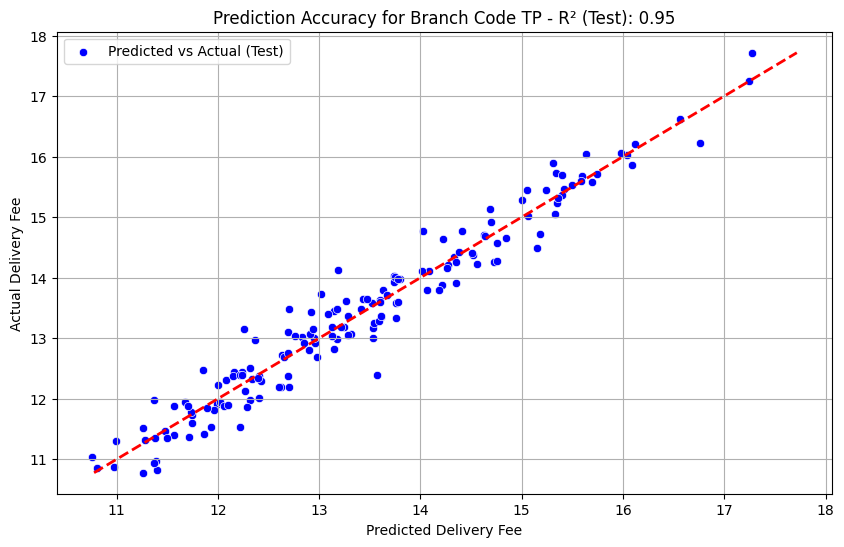

Branch BK - R² Score: 0.98


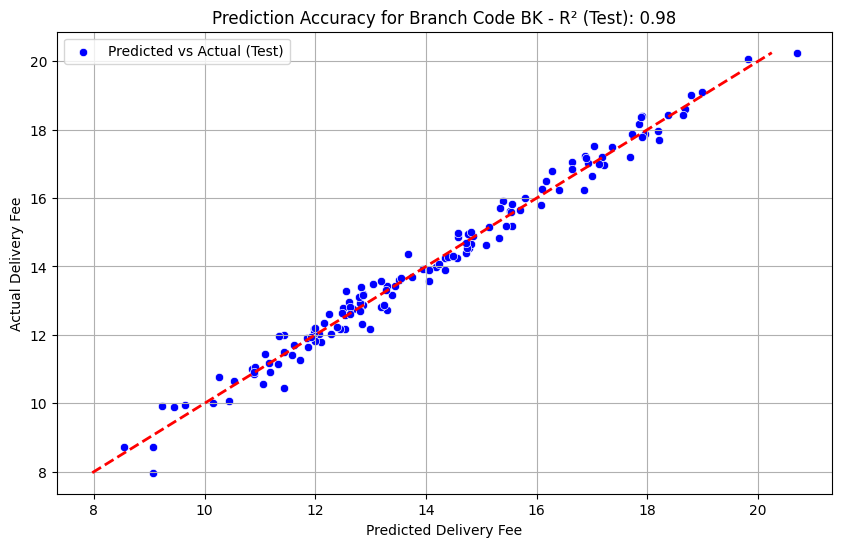

Branch NS - R² Score: 0.96


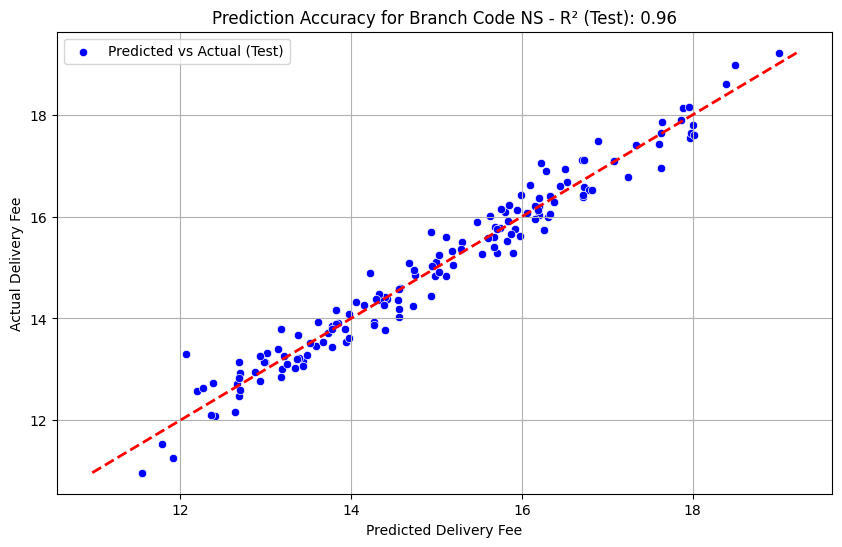

In [ ]:
data_with_fees = imputed_missing_df.dropna(subset = ['full_fee'])

branch_codes = data_with_fees['branch_code'].unique()
models = {}

# Loop through each branch code
for code in branch_codes:
    # Filter data for the current branch
    branch_data = data_with_fees[(data_with_fees['branch_code'] == code)]

    if not branch_data.empty:
        # Define feature columns and target column
        features = branch_data[['distance_to_customer_KM', 'weekend', 'time_of_day']]
        target = branch_data['full_fee']

        # Fit the linear regression model
        model = LinearRegression()
        model.fit(features, target)

        models[code] = model

        # Predict the delivery fee for the test set
        predicted_test = model.predict(features)

        # Calculate the R-squared score
        r2_test = r2_score(target, predicted_test)
        print(f'Branch {code} - R² Score: {r2_test:.2f}')

        # Plot the predicted vs actual delivery fee with R² score for test set
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=predicted_test, y=target, color='blue', label='Predicted vs Actual (Test)')
        plt.plot([target.min(), target.max()], [target.min(), target.max()], 'r--', lw=2)
        plt.title(f'Prediction Accuracy for Branch Code {code} - R² (Test): {r2_test:.2f}')
        plt.xlabel('Predicted Delivery Fee')
        plt.ylabel('Actual Delivery Fee')
        plt.legend()
        plt.grid(True)
        plt.show()



After evaluating the models, we use them to impute the delivery fees. For customers with loyalty (where `customerHasloyalty?` is 1), we adjust the predicted delivery fees by applying a 50% discount before imputing the values. For customers without loyalty, we use the predicted delivery fees directly for imputation.

In [ ]:
# Discount 50% for Loyalty
discount_rate = 0.50

for code, model in models.items():
    # Filter data for the current branch with missing delivery fees
    for loyalty in [0, 1]:
        branch_data_missing = imputed_missing_df[(imputed_missing_df['branch_code'] == code) & (imputed_missing_df['customerHasloyalty?'] == loyalty) & (imputed_missing_df['delivery_fee'].isnull())]

        if not branch_data_missing.empty:
            # Define feature columns for missing data
            features_missing = branch_data_missing[['distance_to_customer_KM', 'weekend', 'time_of_day']]

            # Predict the delivery fee
            predicted_fees = model.predict(features_missing)

            if loyalty == 1:
                # Adjust the predicted delivery fees
                adjusted_fees = predicted_fees * (1 - discount_rate)
            else:
                adjusted_fees = predicted_fees

            # Impute the missing delivery fees
            imputed_missing_df.loc[branch_data_missing.index, 'delivery_fee'] = adjusted_fees

After predicting the delivery fees, we check whether there are any missing rows left. We then print the DataFrame to verify our imputation.

In [ ]:
null_values = imputed_missing_df.isnull().sum()

print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
order_id                    0
date                        0
time                        0
order_type                  0
branch_code                 0
order_items                 0
order_price                 0
customer_lat                0
customer_lon                0
customerHasloyalty?         0
distance_to_customer_KM     0
delivery_fee                0
full_fee                   50
weekend                     0
time_of_day                 0
dtype: int64


In [ ]:
# Display the first 10 rows
imputed_missing_df.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,full_fee,weekend,time_of_day
0,ORDB01139,2018-04-15,11:22:49,Breakfast,TP,"[('Cereal', 7), ('Coffee', 4)]",177.00,-37.816611,144.986715,0,9.488,13.167683,13.167683,1,0
1,ORDJ06783,2018-01-21,08:30:25,Breakfast,TP,"[('Pancake', 6), ('Coffee', 8), ('Eggs', 2)]",249.50,-37.800116,144.971195,0,10.056,14.776037,14.776037,1,0
2,ORDA06924,2018-03-02,09:51:32,Breakfast,BK,"[('Coffee', 8), ('Eggs', 9), ('Pancake', 2), (...",453.50,-37.818538,144.991194,0,5.636,10.075048,10.075048,0,0
3,ORDZ10811,2018-12-31,20:00:00,Dinner,NS,"[('Pasta', 7), ('Salmon', 9), ('Fish&Chips', 4)]",701.50,-37.805867,144.999458,0,10.133,16.040253,16.040253,0,2
4,ORDB01235,2018-08-08,15:16:03,Lunch,TP,"[('Salad', 3), ('Chicken', 2), ('Steak', 5), (...",364.60,-37.811808,144.955777,0,8.717,12.434995,12.434995,0,1
5,ORDK02444,2018-12-01,19:09:17,Dinner,BK,"[('Pasta', 8), ('Shrimp', 2)]",328.00,-37.818670,144.966497,0,7.676,17.529172,17.529172,1,2
6,ORDA08315,2018-01-30,08:50:42,Breakfast,BK,"[('Pancake', 4), ('Eggs', 4), ('Coffee', 5), (...",411.50,-37.806851,144.974657,0,6.709,11.417807,11.417807,0,0
7,ORDK02750,2018-01-12,08:20:16,Breakfast,BK,"[('Pancake', 5), ('Coffee', 3)]",143.75,-37.798971,144.970709,1,7.689,6.475532,12.951064,0,0
8,ORDK09991,2018-01-01,08:00:00,Breakfast,BK,"[('Cereal', 8), ('Coffee', 1), ('Pancake', 10)...",594.00,-37.804171,144.958459,1,7.922,6.599585,13.199170,0,0
9,ORDK04229,2018-10-18,17:38:01,Dinner,BK,"[('Pasta', 7), ('Fish&Chips', 5)]",367.50,-37.818658,144.967025,0,7.598,14.295005,14.295005,0,2


<div class="alert alert-block alert-info">
    
### 3.3 Dirty Data <a class="anchor" name="miss"></a>

<div class="alert alert-block alert-info">
    
#### 3.3.1 Inconsistent Date Column <a class="anchor" name="dirty_date"></a>

We observe an inconsistent date format in some rows. For instance, the order `ORDI03289` has a date format of `yyyy-mm-dd` while the order `ORDK01081` has format of `yyyy-dd-mm`.

In [ ]:
specific_orders = dirty_data[(dirty_data['order_id'] == 'ORDI03289') | (dirty_data['order_id'] == 'ORDK01081')]
specific_orders.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDI03289,2018-03-15,10:21:58,Breakfast,TP,"[('Cereal', 6), ('Eggs', 7), ('Pancake', 7), (...",524.75,-37.803171,144.948420,0,8.504,13.566417
18,ORDK01081,2018-13-10,17:27:53,Dinner,BK,"[('Salmon', 7), ('Shrimp', 2)]",395.00,-37.820552,144.957234,0,8.399,18.166899


In this section of the code, we address rows with inconsistent date formats by defining a function, `fix_date`, which attempts to parse the date string using various date formats. If the date string can be parsed and requires a format change, the function returns the corrected date string and the index of the row. We also maintain a set, `fixed_indices`, to keep track of the indices of rows with data anomalies detected.

In [ ]:
dirty_data_copy = dirty_data.copy()

def fix_date(date_str, index):
    formats_to_try = [
        ('%Y-%m-%d', None),
        ('%Y-%d-%m', '%Y-%m-%d'),
        ('%d-%m-%Y', '%Y-%m-%d')
    ]

    for input_format, output_format in formats_to_try:
        try:
            date_obj = pd.to_datetime(date_str, format=input_format)
            if output_format:
                corrected_date = date_obj.strftime(output_format)
                return corrected_date, index
            return date_str, None
        except ValueError:
            continue
    return date_str, None

fixed_indices = set()
new_fixed_indices=[]

for i, row in dirty_data_copy.iterrows():
    new_date, fixed_index = fix_date(row['date'], i)
    dirty_data_copy.at[i, 'date'] = new_date
    if fixed_index is not None:
        fixed_indices.add(fixed_index)
        new_fixed_indices.append(fixed_index)

print("Fixed indices:", sorted(fixed_indices))

print("Total unique fixes:", len(fixed_indices))
print("Total rows of the DataFrame:", len(dirty_data_copy))

Fixed indices: [18, 32, 53, 76, 90, 98, 116, 122, 132, 153, 164, 166, 167, 182, 201, 203, 207, 230, 231, 240, 269, 276, 279, 292, 318, 326, 349, 353, 371, 381, 413, 414, 437, 463, 478, 492, 496]
Total unique fixes: 37
Total rows of the DataFrame: 500


<div class="alert alert-block alert-info">
    
#### 3.3.2 Incorrect Order Type <a class="anchor" name="dirty_order_type"></a>

In this section of the code, we correct the incorrect data type of order classifications by first defining a function, `classify_order_type`, converts the order time to a time object and classifies it as `Breakfast`, `Lunch`, `Dinner`, or `Unknown` based on predefined time intervals.

In [ ]:
def classify_order_type(order_time):
  time = pd.to_datetime(order_time).time()
  if time >= pd.to_datetime('08:00:00').time() and time <= pd.to_datetime('12:00:00').time():
      return 'Breakfast'
  elif time >= pd.to_datetime('12:00:01').time() and time <= pd.to_datetime('16:00:00').time():
      return 'Lunch'
  elif time >= pd.to_datetime('16:00:01').time() and time <= pd.to_datetime('20:00:00').time():
      return 'Dinner'
  else:
      return 'Unknown'

We then update the `order_type` column by setting it to the values in the `classified_order_type` column for the identified incorrect orders. Then, we drop the temporary `classified_order_type` column.

In [ ]:
dirty_data_copy['classified_order_type'] = dirty_data_copy['time'].apply(classify_order_type)

incorrect_orders = dirty_data_copy[dirty_data_copy['order_type'] != dirty_data_copy['classified_order_type']]

incorrect_indexes = dirty_data_copy[dirty_data_copy['order_type'] != dirty_data_copy['classified_order_type']].index
fixed_indices.update(incorrect_indexes)

print("Fixed Indices: ", len(incorrect_orders.index))
print("Incorrect orders:")
incorrect_orders.head(10)

Fixed Indices:  37
Incorrect orders:


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,classified_order_type
4,ORDC01352,2018-03-23,10:42:15,Dinner,NS,"[('Coffee', 6), ('Cereal', 7), ('Pancake', 5)]",313.25,-37.800658,144.957766,0,7.306,12.704720,Breakfast
8,ORDK04546,2018-03-12,10:11:49,Lunch,BK,"[('Cereal', 1), ('Coffee', 3), ('Eggs', 9), ('...",362.75,-37.815235,144.946093,0,9.122,13.930200,Breakfast
27,ORDI08717,2018-05-30,12:54:05,Dinner,NS,"[('Steak', 10), ('Fries', 3), ('Chicken', 1), ...",762.40,-37.817385,144.952672,0,9.039,14.170670,Lunch
31,ORDB08499,2018-08-02,15:05:54,Dinner,TP,"[('Steak', 8), ('Chicken', 5)]",520.00,-37.801010,144.972416,0,10.016,13.263946,Lunch
101,ORDJ07822,2018-06-12,13:24:30,Breakfast,TP,"[('Fries', 2), ('Chicken', 7), ('Burger', 2)]",310.00,-37.805195,144.943143,0,10.229,13.331701,Lunch
104,ORDZ03389,2018-01-19,08:30:25,Dinner,NS,"[('Coffee', 7), ('Eggs', 3), ('Cereal', 10), (...",522.50,-37.806120,144.956154,0,8.267,13.432778,Breakfast
113,ORDZ06676,2018-01-10,08:10:08,Dinner,NS,"[('Cereal', 6), ('Pancake', 8), ('Eggs', 9)]",518.00,-37.806988,144.957088,1,8.157,6.293877,Breakfast
134,ORDI10598,2018-06-27,13:54:55,Dinner,NS,"[('Burger', 7), ('Fries', 9), ('Salad', 9), ('...",543.80,-37.825823,144.984810,0,9.556,15.225996,Lunch
137,ORDA03214,2018-04-08,11:12:40,Lunch,BK,"[('Eggs', 8), ('Pancake', 1)]",200.25,-37.817592,144.967222,0,7.440,15.167834,Breakfast
145,ORDZ01804,2018-09-28,16:57:27,Lunch,NS,"[('Fish&Chips', 1), ('Pasta', 5), ('Shrimp', 1...",1040.50,-37.808490,144.945285,0,9.017,14.856056,Dinner


In [ ]:
dirty_data_copy.loc[incorrect_indexes, 'order_type'] = dirty_data_copy.loc[incorrect_indexes, 'classified_order_type']

dirty_data_copy.drop(columns = ['classified_order_type'], inplace = True)

print("Fixed indices:", sorted(fixed_indices))
print("Total unique corrections:", len(fixed_indices))

# Display the corrected DataFrame
print("Total rows of the DataFrame:", len(dirty_data_copy))
print("DataFrame with corrected order types:")
dirty_data_copy.head(10)

Fixed indices: [4, 8, 18, 27, 31, 32, 53, 76, 90, 98, 101, 104, 113, 116, 122, 132, 134, 137, 145, 153, 154, 155, 161, 162, 164, 166, 167, 178, 182, 201, 202, 203, 205, 206, 207, 230, 231, 237, 240, 245, 269, 272, 276, 279, 292, 316, 318, 319, 323, 326, 330, 343, 349, 353, 371, 379, 381, 390, 407, 413, 414, 425, 432, 437, 446, 452, 454, 463, 468, 470, 471, 478, 492, 496]
Total unique corrections: 74
Total rows of the DataFrame: 500
DataFrame with corrected order types:


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDI03289,2018-03-15,10:21:58,Breakfast,TP,"[('Cereal', 6), ('Eggs', 7), ('Pancake', 7), (...",524.75,-37.803171,144.948420,0,8.504,13.566417
1,ORDZ07843,2018-09-22,16:47:19,Dinner,NS,"[('Salmon', 10), ('Fish&Chips', 9), ('Shrimp',...",834.00,-37.804212,144.987891,0,10.017,15.837048
2,ORDC11021,2018-07-27,14:45:38,Lunch,NS,"[('Steak', 2), ('Fries', 4), ('Chicken', 3), (...",251.20,-37.827110,144.983670,0,9.566,15.116505
3,ORDJ04841,2018-07-04,14:05:04,Lunch,TP,"[('Steak', 8), ('Burger', 1), ('Fries', 8), ('...",831.40,-37.821810,144.951870,0,8.481,12.295377
4,ORDC01352,2018-03-23,10:42:15,Breakfast,NS,"[('Coffee', 6), ('Cereal', 7), ('Pancake', 5)]",313.25,-37.800658,144.957766,0,7.306,12.704720
5,ORDB03088,2018-03-02,09:51:32,Breakfast,TP,"[('Coffee', 4), ('Cereal', 1), ('Eggs', 9)]",249.00,-37.824616,144.988997,1,9.234,12.099780
6,ORDA08044,2018-02-15,09:21:07,Breakfast,BK,"[('Eggs', 2), ('Coffee', 6)]",89.00,-37.796020,145.001054,0,5.855,10.828739
7,ORDA02189,2018-08-01,14:55:46,Lunch,BK,"[('Burger', 9), ('Fries', 7), ('Steak', 8), ('...",1146.20,-37.802365,144.971877,0,7.215,13.024725
8,ORDK04546,2018-03-12,10:11:49,Breakfast,BK,"[('Cereal', 1), ('Coffee', 3), ('Eggs', 9), ('...",362.75,-37.815235,144.946093,0,9.122,13.930200
9,ORDX01429,2018-04-09,11:12:40,Breakfast,BK,"[('Pancake', 9), ('Eggs', 5), ('Burger', 2), (...",448.25,-37.814187,144.950255,0,10.695,15.459564


<div class="alert alert-block alert-info">
    
#### 3.3.3 Inconsistent Branch Code <a class="anchor" name="dirty_branch_code"></a>

In this section, we detect and fix two anomalies in the `branch_code`:

1. Lower-case branch codes
2. Mismatched branch codes.

We first convert any lower-case branch codes to upper-case and then ensure the `order_id` pattern matches the correct `branch_code`, then update the DataFrame and record the indices of fixed rows.

In [ ]:
grouped_df = dirty_data_copy.groupby('branch_code')

for branch_code, group_df in grouped_df:
    print(f"Branch Code: {branch_code}")

    # Iterate over each row in the group
    for idx, row in group_df.iterrows():
        # Fixing dirty data by converting branch_code to lowercase
        if isinstance(row['branch_code'], str):  # Check if the value is a string
            # Check if the branch_code is lowercase
            if row['branch_code'].islower():
                # Append index to fixed_indices
                fixed_indices.add(idx)
                # Convert branch_code to uppercase and update the DataFrame
                dirty_data_copy.at[idx, 'branch_code'] = row['branch_code'].upper()

# Print the indices where fixes were made
print("Total unique corrections:", len(fixed_indices))
print("Indices of fixed data:", sorted(fixed_indices))

Branch Code: BK
Branch Code: NS
Branch Code: TP
Branch Code: bk
Branch Code: ns
Branch Code: tp
Total unique corrections: 101
Indices of fixed data: [4, 8, 18, 27, 31, 32, 53, 54, 76, 90, 98, 101, 104, 110, 113, 116, 118, 122, 129, 132, 134, 137, 145, 149, 153, 154, 155, 161, 162, 164, 166, 167, 178, 182, 196, 200, 201, 202, 203, 205, 206, 207, 210, 215, 218, 229, 230, 231, 237, 238, 240, 241, 245, 252, 265, 269, 272, 276, 279, 281, 292, 302, 316, 318, 319, 323, 326, 330, 343, 349, 353, 370, 371, 379, 381, 389, 390, 407, 408, 413, 414, 425, 429, 432, 437, 446, 450, 452, 454, 456, 461, 463, 468, 470, 471, 478, 481, 483, 489, 492, 496]


We then initialize a dictionary `branch_groups` to store the patterns of `order_id` characters for each `branch_code`. We extract the character at index 3 of `order_id` for each branch and store it.

In [ ]:
branch_groups = {}

# Iterate over the DataFrame rows
for index, row in outlier_data.iterrows():
    order_id = row['order_id']
    branch_code = row['branch_code']

    # Ensure order_id is a string and is long enough
    if isinstance(order_id, str) and len(order_id) >= 5:
        char_index_4 = order_id[3]

        # Initialize a set if not already present for the branch_code
        if branch_code not in branch_groups:
            branch_groups[branch_code] = set()

        # Add the extracted character to the set
        branch_groups[branch_code].add(char_index_4)

# Sort and print the results grouped by branch code
for branch, chars in branch_groups.items():
    sorted_chars = sorted(chars)  # Convert set to a sorted list
    print(f"Branch {branch}: {sorted_chars}")

Branch NS: ['C', 'I', 'Z']
Branch TP: ['B', 'J', 'Y']
Branch BK: ['A', 'K', 'X']


Consequently, we check each `order_id` against the extracted patterns and identify any mismatches, storing these invalid entries and print the rows with mismatched branch code.

In [ ]:
invalid_entries = []
for index, row in dirty_data_copy.iterrows():
    order_id = row['order_id']
    branch_code = row['branch_code']

    if len(order_id) > 3:
      char_index_3 = order_id[3]
      if char_index_3 not in branch_groups[branch_code]:
        invalid_entries.append((index, order_id, branch_code, f"Invalid character at index 3: {char_index_3}"))

# Report invalid entries
if invalid_entries:
    print("Entries with issues:")
    for entry in invalid_entries:
        print(f"Index: {entry[0]}, Order ID: {entry[1]}, Branch Code: {entry[2]}, Error: {entry[3]}")
else:
    print("All entries have correct branch codes and characters at index 3.")

Entries with issues:
Index: 0, Order ID: ORDI03289, Branch Code: TP, Error: Invalid character at index 3: I
Index: 20, Order ID: ORDC03946, Branch Code: BK, Error: Invalid character at index 3: C
Index: 54, Order ID: ORDJ01166, Branch Code: NS, Error: Invalid character at index 3: J
Index: 92, Order ID: ORDJ10945, Branch Code: BK, Error: Invalid character at index 3: J
Index: 110, Order ID: ORDB05832, Branch Code: NS, Error: Invalid character at index 3: B
Index: 118, Order ID: ORDB10113, Branch Code: BK, Error: Invalid character at index 3: B
Index: 179, Order ID: ORDC05246, Branch Code: TP, Error: Invalid character at index 3: C
Index: 196, Order ID: ORDB09002, Branch Code: BK, Error: Invalid character at index 3: B
Index: 197, Order ID: ORDX09024, Branch Code: NS, Error: Invalid character at index 3: X
Index: 200, Order ID: ORDY08214, Branch Code: BK, Error: Invalid character at index 3: Y
Index: 210, Order ID: ORDC04159, Branch Code: BK, Error: Invalid character at index 3: C
Index

Once the invalid entries are identified, We define a function, `find_correct_branch`, to determine the correct `branch_code` based on the character at index 3 of `order_id`. We then update the DataFrame with the correct `branch_code` for rows with invalid entries, recording the changes made.

In [ ]:
# Define a function to find the correct branch code
def find_correct_branch(char):
    #Find the correct branch based on the character
    for branch, chars in branch_groups.items():
        if char in chars:
            return branch
    return None  # Return None if no branch matches

# Update DataFrame with the correct branch_code
changes = []  # To record changes made
for index, row in dirty_data_copy.iterrows():
    order_id = row['order_id']
    current_branch = row['branch_code']

    if len(order_id) > 3:
        char_index_3 = order_id[3]  # Get the character at index 3
        correct_branch = find_correct_branch(char_index_3)

        if correct_branch and correct_branch != current_branch:
            dirty_data_copy.at[index, 'branch_code'] = correct_branch
            changes.append((index, order_id, current_branch, correct_branch))

# Report changes
if changes:
    print("Updated branch and item codes:")
    for change in changes:
        fixed_indices.add(change[0])
        print(f"Index: {change[0]}, Order ID: {change[1]}, Old Branch: {change[2]}, New Branch: {change[3]}")
else:
    print("No branch codes needed updating.")

print("Total rows of the DataFrame:", len(dirty_data_copy))

Updated branch and item codes:
Index: 0, Order ID: ORDI03289, Old Branch: TP, New Branch: NS
Index: 20, Order ID: ORDC03946, Old Branch: BK, New Branch: NS
Index: 54, Order ID: ORDJ01166, Old Branch: NS, New Branch: TP
Index: 92, Order ID: ORDJ10945, Old Branch: BK, New Branch: TP
Index: 110, Order ID: ORDB05832, Old Branch: NS, New Branch: TP
Index: 118, Order ID: ORDB10113, Old Branch: BK, New Branch: TP
Index: 179, Order ID: ORDC05246, Old Branch: TP, New Branch: NS
Index: 196, Order ID: ORDB09002, Old Branch: BK, New Branch: TP
Index: 197, Order ID: ORDX09024, Old Branch: NS, New Branch: BK
Index: 200, Order ID: ORDY08214, Old Branch: BK, New Branch: TP
Index: 210, Order ID: ORDC04159, Old Branch: BK, New Branch: NS
Index: 215, Order ID: ORDK01998, Old Branch: NS, New Branch: BK
Index: 229, Order ID: ORDK05374, Old Branch: NS, New Branch: BK
Index: 238, Order ID: ORDJ09755, Old Branch: BK, New Branch: TP
Index: 241, Order ID: ORDI02489, Old Branch: BK, New Branch: NS
Index: 252, Or

<div class="alert alert-block alert-info">
    
#### 3.3.4 Mismatched Menu <a class="anchor" name="dirty_menu"></a>

We observed that the order items of some rows contain mismatched menu. For instance, the meal type of order `ORDY03381` is stated as breakfast but the order items are [('Eggs', 1), ('Pasta', 3)] where pasta belongs to the lunch meal. In this section, we address mismatched menu items by first initializing a dictionary to store sets of items for each meal category. We iterate over the `missing_data` DataFrame to populate the `meal_items_reference` dictionary with items for each meal type.

In [ ]:
# If order_items is stored as a string representation of list, convert it to actual list
missing_data['order_items_val'] = missing_data['order_items'].apply(eval)

# Dictionary to store sets of items for each meal category
meal_items_reference = {'Breakfast': set(), 'Lunch': set(), 'Dinner': set()}

# Populate the meal_items_reference dictionary
for index, row in missing_data.iterrows():
    meal_type = row['order_type']
    items = [item_tuple[0] for item_tuple in row['order_items_val']]
    meal_items_reference[meal_type].update(items)

# Print categorized meal items to review
for meal_type, items in meal_items_reference.items():
    print(f"{meal_type} items: {items}")

Breakfast items: {'Coffee', 'Cereal', 'Eggs', 'Pancake'}
Lunch items: {'Steak', 'Burger', 'Salad', 'Fries', 'Chicken'}
Dinner items: {'Shrimp', 'Fish&Chips', 'Pasta', 'Salmon'}


Once we obtain the menu list for each meal type, we attempt to get the unit price of each menu. We define `parse_order_items`, a function to parse `order_items` and extract item quantities, initializing a dictionary to hold each unique menu item. We then create the matrix A for coefficients and vector b for prices, filling the matrix A with quantities. Finally, we employ the package `np.linalg` to solve the system of equations to find the unit prices of items, if the matrix is square and invertible.

In [ ]:
# Function to parse order items and extract quantities
def parse_order_items(row):
    items = eval(row)
    for item, qty in items:
        if item not in menu_items:
            menu_items[item] = []
        menu_items[item].append(qty)
    return items

In [ ]:
# Initialize a dictionary to hold each unique menu item
menu_items = {}

# Apply the function and create a matrix of coefficients for the equations
missing_data_copy = missing_data.copy()
missing_data_copy['order_items'].apply(parse_order_items)

# Create the matrix A for coefficients and vector b for prices
num_orders = len(missing_data_copy)
num_items = len(menu_items)
A = np.zeros((num_orders, num_items))
b = np.array(missing_data_copy['order_price'])

# Fill the matrix A with quantities
item_index = {item: idx for idx, item in enumerate(menu_items)}
for idx, row in missing_data_copy.iterrows():
    items = parse_order_items(row['order_items'])
    for item, qty in items:
        A[idx, item_index[item]] = qty

# Solve the system if the matrix is square and invertible
if A.shape[0] >= A.shape[1] and np.linalg.matrix_rank(A) == A.shape[1]:
    prices = np.linalg.lstsq(A, b, rcond = None)[0]
    item_prices = {item: round(prices[idx], 2) for item, idx in item_index.items()}
    print(item_prices)
else:
    print("Not enough independent equations to solve the system.")

{'Cereal': 21.0, 'Coffee': 7.5, 'Pancake': 24.25, 'Eggs': 22.0, 'Pasta': 27.5, 'Salmon': 41.0, 'Fish&Chips': 35.0, 'Salad': 17.2, 'Chicken': 32.0, 'Steak': 45.0, 'Fries': 12.0, 'Shrimp': 54.0, 'Burger': 31.0}


Once the unit prices are obtained, we define two functions, `get_menu_items` and `validate_menu_items`, to get menu items from order_items and validate them against the reference dictionary. We then apply these functions to the `dirty_data_copy` DataFrame and identify rows where menu items do not match the expected items and print the first 10 rows of these mismatched rows.

In [ ]:
# Function to parse order items and extract item names
def get_menu_items(row):
  # Convert string to list of tuples using eval
  items = eval(row)
  # Return a list containing only the names of the items
  return [item for item, _ in items]

# Function to check menu items against the reference dictionary
def validate_menu_items(row):
    expected_items = meal_items_reference[row['order_type']]
    # Convert row menu items to set for easy comparison
    menu_items_set = set(row['menu_items'])
    # Check if the set of menu items in the row matches the expected set for that meal type
    return menu_items_set.issubset(expected_items)

In [ ]:
# Apply the function to each row's order_items column
dirty_data_copy['menu_items'] = dirty_data_copy['order_items'].apply(get_menu_items)

# Apply the check function to each row
dirty_data_copy['items_match'] = dirty_data_copy.apply(validate_menu_items, axis = 1)

# Find rows where menu items do not match the expected items
mismatched_rows = dirty_data_copy[~dirty_data_copy['items_match']]

mismatched_rows.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,menu_items,items_match
9,ORDX01429,2018-04-09,11:12:40,Breakfast,BK,"[('Pancake', 9), ('Eggs', 5), ('Burger', 2), (...",448.25,-37.814187,144.950255,0,10.695,15.459564,"[Pancake, Eggs, Burger, Cereal]",False
21,ORDY03381,2018-04-10,11:12:40,Breakfast,TP,"[('Eggs', 1), ('Pasta', 3)]",44.50,-37.805135,144.972235,0,9.695,12.198402,"[Eggs, Pasta]",False
47,ORDY07891,2018-06-20,13:34:38,Lunch,TP,"[('Coffee', 5), ('Burger', 3)]",253.00,-37.822607,144.957979,0,8.108,12.255611,"[Coffee, Burger]",False
49,ORDX02558,2018-11-18,18:38:52,Dinner,BK,"[('Shrimp', 3), ('Fries', 1)]",189.50,-37.817939,145.008530,0,4.005,13.363785,"[Shrimp, Fries]",False
56,ORDA01467,2018-11-18,18:38:52,Dinner,BK,"[('Pancake', 8), ('Salmon', 10), ('Shrimp', 8)]",1122.00,-37.818844,145.006839,0,4.256,13.355110,"[Pancake, Salmon, Shrimp]",False
75,ORDC08705,2018-01-23,08:40:33,Breakfast,NS,"[('Steak', 10), ('Eggs', 7)]",364.00,-37.819025,144.954246,0,9.178,13.691451,"[Steak, Eggs]",False
79,ORDZ01479,2018-10-01,16:57:27,Dinner,NS,"[('Pasta', 4), ('Eggs', 7)]",488.00,-37.819023,144.946778,0,9.607,15.452582,"[Pasta, Eggs]",False
80,ORDJ09552,2018-02-03,09:00:50,Breakfast,TP,"[('Pancake', 1), ('Pasta', 2), ('Coffee', 3), ...",111.75,-37.808798,145.008847,0,12.052,16.262338,"[Pancake, Pasta, Coffee, Cereal]",False
95,ORDA09398,2018-07-26,14:45:38,Lunch,BK,"[('Steak', 9), ('Cereal', 9)]",684.00,-37.804170,144.967617,0,7.368,13.029269,"[Steak, Cereal]",False
96,ORDB01462,2018-11-17,18:38:52,Dinner,TP,"[('Shrimp', 9), ('Fries', 7), ('Salmon', 2)]",813.00,-37.799771,144.975033,0,10.204,15.823558,"[Shrimp, Fries, Salmon]",False


Once again, we keep track of indices of rows with mismatched menu.

In [ ]:
# Display the incorrect orders
incorrect_menu_indexes = mismatched_rows.index
fixed_indices.update(incorrect_menu_indexes)

# Display the indices of rows with anomalies
print("Fixed indices:", fixed_indices)
print("Total unique corrections:", len(fixed_indices))

Fixed indices: {0, 4, 8, 9, 18, 20, 21, 27, 31, 32, 47, 49, 53, 54, 56, 75, 76, 79, 80, 90, 92, 95, 96, 98, 101, 104, 110, 113, 116, 118, 122, 125, 129, 132, 134, 137, 145, 149, 153, 154, 155, 156, 161, 162, 163, 164, 166, 167, 178, 179, 181, 182, 191, 196, 197, 200, 201, 202, 203, 205, 206, 207, 210, 215, 218, 225, 227, 229, 230, 231, 237, 238, 240, 241, 245, 248, 249, 252, 262, 264, 265, 269, 270, 272, 276, 279, 280, 281, 284, 287, 292, 301, 302, 313, 316, 318, 319, 320, 323, 326, 330, 343, 346, 347, 348, 349, 352, 353, 370, 371, 373, 379, 381, 382, 383, 389, 390, 393, 397, 407, 408, 413, 414, 416, 425, 428, 429, 432, 433, 437, 446, 450, 452, 454, 456, 461, 463, 468, 470, 471, 478, 481, 483, 485, 489, 492, 496, 498}
Total unique corrections: 148


We define the function `adjust_order` to correct orders with mismatched items and apply corrections to the `mismatched_rows` DataFrame and map the corrected `order_items` from `mismatched_rows` to `dirty_data_copy` and drop temporary columns.

In [ ]:
# Define a function to correct the order items
def adjust_order(order_type, order_items, order_price, item_prices):
    correct_items = {item: qty for item, qty in order_items if item in meal_items_reference[order_type]}
    incorrect_items = {item: qty for item, qty in order_items if item not in meal_items_reference[order_type]}

    # Calculate the total price from correct items
    current_price = sum(item_prices[item] * qty for item, qty in correct_items.items())
    # Calculate the price that needs to be adjusted for the incorrect item
    price_difference = order_price - current_price

    # Try to find the item in the allowed meal items with a price that matches the calculated price per quantity
    corrected = False
    for item in meal_items_reference[order_type]:
        if item not in correct_items and round((item_prices[item] * list(incorrect_items.values())[0]),2) == round(price_difference,2):
            # If found, update the incorrect item to the correct one
            correct_items[item] = list(incorrect_items.values())[0]
            corrected = True
            break

    if not corrected:
        correct_items.update(incorrect_items)  # If no correction is found, retain the original incorrect items

    # Convert dictionary to list of tuples for the corrected order items
    corrected_order_items = [(item, qty) for item, qty in correct_items.items()]
    return corrected_order_items

for index, row in mismatched_rows.iterrows():
    corrected_items = adjust_order(row['order_type'], eval(row['order_items']), row['order_price'], item_prices)
    mismatched_rows.at[index, 'order_items'] = str(corrected_items)
    print(f"Order ID {row['order_id']} corrected items: {corrected_items}")

Order ID ORDX01429 corrected items: [('Pancake', 9), ('Eggs', 5), ('Cereal', 5), ('Coffee', 2)]
Order ID ORDY03381 corrected items: [('Eggs', 1), ('Coffee', 3)]
Order ID ORDY07891 corrected items: [('Burger', 3), ('Chicken', 5)]
Order ID ORDX02558 corrected items: [('Shrimp', 3), ('Pasta', 1)]
Order ID ORDA01467 corrected items: [('Salmon', 10), ('Shrimp', 8), ('Fish&Chips', 8)]
Order ID ORDC08705 corrected items: [('Eggs', 7), ('Cereal', 10)]
Order ID ORDZ01479 corrected items: [('Pasta', 4), ('Shrimp', 7)]
Order ID ORDJ09552 corrected items: [('Pancake', 1), ('Coffee', 3), ('Cereal', 1), ('Eggs', 2)]
Order ID ORDA09398 corrected items: [('Steak', 9), ('Burger', 9)]
Order ID ORDB01462 corrected items: [('Shrimp', 9), ('Salmon', 2), ('Fish&Chips', 7)]
Order ID ORDK04263 corrected items: [('Shrimp', 8), ('Salmon', 10)]
Order ID ORDC10247 corrected items: [('Pancake', 6), ('Cereal', 3), ('Coffee', 10)]
Order ID ORDY03407 corrected items: [('Coffee', 2), ('Eggs', 7)]
Order ID ORDC09697 co

In [ ]:
# Create a dictionary from mismatched_rows for direct mapping
order_items_update = mismatched_rows.set_index('order_id')['order_items'].to_dict()

# Map the corrected 'order_items' from mismatched_rows to dirty_data_copy
dirty_data_copy['order_items'] = dirty_data_copy['order_id'].map(order_items_update).fillna(dirty_data_copy['order_items'])

# Drop the 'classified_order_type' column
dirty_data_copy.drop(columns = ['menu_items', 'items_match'], inplace = True)

# Print the corrected order items
print("Total rows of the DataFrame:", len(dirty_data_copy))
print("Updated order_items in dirty_data_copy based on mismatched_rows corrections.")
dirty_data_copy[['order_id', 'order_items']].head()

Total rows of the DataFrame: 500
Updated order_items in dirty_data_copy based on mismatched_rows corrections.


,order_id,order_items
0,ORDI03289,"[('Cereal', 6), ('Eggs', 7), ('Pancake', 7), (..."
1,ORDZ07843,"[('Salmon', 10), ('Fish&Chips', 9), ('Shrimp',..."
2,ORDC11021,"[('Steak', 2), ('Fries', 4), ('Chicken', 3), (..."
3,ORDJ04841,"[('Steak', 8), ('Burger', 1), ('Fries', 8), ('..."
4,ORDC01352,"[('Coffee', 6), ('Cereal', 7), ('Pancake', 5)]"


Finally, we iterate over the dirty_data_copy DataFrame to check for any remaining anomalies in the menu items, printing any anomalies found.

In [ ]:
anomalies = []

# Iterate over each row in the dirty data
for index, row in dirty_data_copy.iterrows():
    meal_type = row['order_type']
    order_items_val = eval(row['order_items'])  # Evaluate 'order_items'
    items = {item_tuple[0] for item_tuple in order_items_val}  # Convert to set

    # Compare items in the row with meal_items dictionary
    for meal_category, meal_category_items in meal_items_reference.items():
        if meal_category != meal_type:
            common_items = items & meal_category_items
            if common_items:
                anomalies.append((index, meal_type, meal_category, common_items))

# Print anomalies
if anomalies:
    print("Anomalies:")
    for anomaly in anomalies:
        print(f"Items from {anomaly[2]} found in {anomaly[1]}: {anomaly[3]} (Index: {anomaly[0]})")
else:
    print("No anomalies found.")

No anomalies found.


<div class="alert alert-block alert-info">
    
#### 3.3.5 Incorrect Order Price <a class="anchor" name="dirty_order_price"></a>

In this section, we address incorrect order prices by recalculating the total price by summing the result of quantity times the unit price of each menu item in the order. We first define a function, `recalculate_order_price`, that calculates the total price of an order by summing the product of item quantities and their unit prices. We then apply the `recalculate_order_price` function to each row of `dirty_data_copy` to create a new column, `recalculated_order_price`. Consequently, we identify rows where the original `order_price` does not match the `recalculated_order_price` and record the indices of these incorrect prices to keep track of rows with anomalies. Finally, we update the `order_price` column with the recalculated prices for the identified incorrect prices and drop the `recalculated_order_price` column from the DataFrame.

In [ ]:
# Function to recalculate order prices based on the calculated item prices
def recalculate_order_price(row):
    items = eval(row['order_items'])
    return sum(item_prices[item] * qty for item, qty in items if item in item_prices)

# Recalculate each order's price and create a new column for it
dirty_data_copy['recalculated_order_price'] = dirty_data_copy.apply(recalculate_order_price, axis=1)

# Display the incorrect orders
incorrect_price_indexes = dirty_data_copy[round(dirty_data_copy['order_price'], 2) != round(dirty_data_copy['recalculated_order_price'], 2)].index
fixed_indices.update(incorrect_price_indexes)
print("Fixed indices:", fixed_indices)
print("Total unique corrections:", len(fixed_indices))

Fixed indices: {0, 4, 8, 9, 10, 16, 18, 20, 21, 23, 27, 31, 32, 38, 45, 47, 49, 53, 54, 56, 75, 76, 79, 80, 82, 88, 90, 91, 92, 95, 96, 98, 101, 103, 104, 109, 110, 113, 116, 118, 122, 125, 126, 129, 131, 132, 134, 137, 145, 149, 153, 154, 155, 156, 160, 161, 162, 163, 164, 166, 167, 169, 170, 171, 178, 179, 181, 182, 191, 196, 197, 199, 200, 201, 202, 203, 205, 206, 207, 210, 215, 218, 225, 227, 229, 230, 231, 233, 237, 238, 240, 241, 242, 245, 248, 249, 252, 262, 264, 265, 268, 269, 270, 272, 273, 276, 279, 280, 281, 284, 286, 287, 292, 293, 301, 302, 313, 316, 318, 319, 320, 323, 326, 327, 330, 339, 343, 346, 347, 348, 349, 352, 353, 362, 370, 371, 373, 376, 379, 381, 382, 383, 389, 390, 393, 397, 405, 407, 408, 413, 414, 416, 418, 424, 425, 426, 428, 429, 432, 433, 434, 435, 437, 439, 446, 450, 452, 454, 456, 461, 463, 468, 469, 470, 471, 478, 481, 483, 485, 489, 492, 496, 498, 499}
Total unique corrections: 184


In [ ]:
# Replace the mismatched order price with the recalculated price
dirty_data_copy.loc[incorrect_price_indexes, 'order_price'] = dirty_data_copy.loc[incorrect_price_indexes, 'recalculated_order_price']

# Drop the 'recalculated_order_price' column
dirty_data_copy.drop(columns=['recalculated_order_price'], inplace=True)

# Display the corrected DataFrame
print("Total rows of the DataFrame:", len(dirty_data_copy))
print("DataFrame with corrected order prices:")
dirty_data_copy.loc[~dirty_data_copy.index.isin(incorrect_menu_indexes)].head()

Total rows of the DataFrame: 500
DataFrame with corrected order prices:


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDI03289,2018-03-15,10:21:58,Breakfast,NS,"[('Cereal', 6), ('Eggs', 7), ('Pancake', 7), (...",524.75,-37.803171,144.948420,0,8.504,13.566417
1,ORDZ07843,2018-09-22,16:47:19,Dinner,NS,"[('Salmon', 10), ('Fish&Chips', 9), ('Shrimp',...",834.00,-37.804212,144.987891,0,10.017,15.837048
2,ORDC11021,2018-07-27,14:45:38,Lunch,NS,"[('Steak', 2), ('Fries', 4), ('Chicken', 3), (...",251.20,-37.827110,144.983670,0,9.566,15.116505
3,ORDJ04841,2018-07-04,14:05:04,Lunch,TP,"[('Steak', 8), ('Burger', 1), ('Fries', 8), ('...",831.40,-37.821810,144.951870,0,8.481,12.295377
4,ORDC01352,2018-03-23,10:42:15,Breakfast,NS,"[('Coffee', 6), ('Cereal', 7), ('Pancake', 5)]",313.25,-37.800658,144.957766,0,7.306,12.704720


<div class="alert alert-block alert-info">
    
#### 3.3.6 Switched Latitude and Longitude <a class="anchor" name="dirty_lat_lon"></a>


In this section, we fix switched latitude and longitude values by identifying rows with out-of-range coordinates, swapping incorrect values, and correcting sign issues.

We first identify rows with latitude values outside the range [-90, 90] and longitude values outside the range [-180, 180] and swap latitude and longitude values for rows with out-of-range coordinates and update the fixed_indices set with the indices of the corrected rows. Consequently, we update the set to keep track of the indices where fixes were made.

In [ ]:
# Filter rows with latitude values outside the range [-90, 90]
out_of_range_lat = dirty_data_copy[(dirty_data_copy['customer_lat'] < -90) | (dirty_data_copy['customer_lat'] > 90)]

# Filter rows with longitude values outside the range [-180, 180]
out_of_range_lon = dirty_data_copy[(dirty_data_copy['customer_lon'] < -180) | (dirty_data_copy['customer_lon'] > 180)]

# Swap latitude and longitude values for rows with out-of-range coordinates and track the indices
if not out_of_range_lat.empty:
    dirty_data_copy.loc[out_of_range_lat.index, ['customer_lat', 'customer_lon']] = dirty_data_copy.loc[out_of_range_lat.index, ['customer_lon', 'customer_lat']].values
    fixed_indices.update(out_of_range_lat.index)

if not out_of_range_lon.empty:
    dirty_data_copy.loc[out_of_range_lon.index, ['customer_lat', 'customer_lon']] = dirty_data_copy.loc[out_of_range_lon.index, ['customer_lon', 'customer_lat']].values
    fixed_indices.update(out_of_range_lon.index)

# Print the fixed indices set and count the unique entries
print("Fixed indices:", fixed_indices)
print("Total unique fixes:", len(fixed_indices))

# Display the modified DataFrame
dirty_data_copy.head()

Fixed indices: {0, 4, 8, 9, 10, 16, 18, 20, 21, 23, 27, 31, 32, 38, 45, 47, 49, 53, 54, 56, 75, 76, 79, 80, 82, 85, 88, 90, 91, 92, 95, 96, 98, 101, 103, 104, 109, 110, 113, 116, 118, 122, 125, 126, 129, 131, 132, 134, 135, 137, 145, 149, 152, 153, 154, 155, 156, 160, 161, 162, 163, 164, 166, 167, 169, 170, 171, 178, 179, 181, 182, 191, 196, 197, 199, 200, 201, 202, 203, 205, 206, 207, 210, 215, 218, 222, 225, 227, 229, 230, 231, 233, 237, 238, 240, 241, 242, 245, 248, 249, 252, 262, 264, 265, 268, 269, 270, 272, 273, 276, 279, 280, 281, 284, 286, 287, 292, 293, 301, 302, 313, 316, 318, 319, 320, 323, 326, 327, 330, 339, 343, 346, 347, 348, 349, 352, 353, 362, 370, 371, 373, 376, 379, 381, 382, 383, 389, 390, 393, 397, 405, 407, 408, 413, 414, 416, 418, 424, 425, 426, 428, 429, 432, 433, 434, 435, 437, 439, 446, 450, 452, 454, 456, 461, 463, 468, 469, 470, 471, 478, 481, 483, 485, 489, 492, 496, 498, 499}
Total unique fixes: 188


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDI03289,2018-03-15,10:21:58,Breakfast,NS,"[('Cereal', 6), ('Eggs', 7), ('Pancake', 7), (...",524.75,-37.803171,144.948420,0,8.504,13.566417
1,ORDZ07843,2018-09-22,16:47:19,Dinner,NS,"[('Salmon', 10), ('Fish&Chips', 9), ('Shrimp',...",834.00,-37.804212,144.987891,0,10.017,15.837048
2,ORDC11021,2018-07-27,14:45:38,Lunch,NS,"[('Steak', 2), ('Fries', 4), ('Chicken', 3), (...",251.20,-37.827110,144.983670,0,9.566,15.116505
3,ORDJ04841,2018-07-04,14:05:04,Lunch,TP,"[('Steak', 8), ('Burger', 1), ('Fries', 8), ('...",831.40,-37.821810,144.951870,0,8.481,12.295377
4,ORDC01352,2018-03-23,10:42:15,Breakfast,NS,"[('Coffee', 6), ('Cereal', 7), ('Pancake', 5)]",313.25,-37.800658,144.957766,0,7.306,12.704720


Next, we identify rows with positive latitude values (which should be negative) and correct them by multiplying by -1. We update the `fixed_indices` set with these indices. We then identify rows with negative longitude values (which should be positive) and correct them by multiplying by -1. We update the `fixed_indices` set with these indices. Finally, we print the indices where corrections were made and the total number of unique corrections.

In [ ]:
# Filter rows with positive latitude values
positive_lat_data = dirty_data_copy[dirty_data_copy['customer_lat'] > 0]

# Print rows with positive latitude
print("Rows with positive latitude:")
positive_lat_data.head()

Rows with positive latitude:


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
26,ORDI10950,2018-08-11,15:16:03,Lunch,NS,"[('Fries', 6), ('Salad', 5), ('Burger', 9), ('...",617.0,37.801269,144.963706,0,6.790,13.750995
28,ORDK08882,2018-10-08,17:17:44,Dinner,BK,"[('Pasta', 2), ('Fish&Chips', 5), ('Shrimp', 6...",841.0,37.815659,144.958136,0,8.201,14.949012
64,ORDB03196,2018-09-20,16:37:10,Dinner,TP,"[('Fish&Chips', 8), ('Pasta', 4), ('Salmon', 9...",813.0,37.820152,144.965115,0,7.272,11.830356
72,ORDJ07885,2018-11-06,18:08:27,Dinner,TP,"[('Shrimp', 1), ('Pasta', 3)]",136.5,37.815173,144.963579,0,7.909,12.032327
73,ORDJ09247,2018-03-16,10:21:58,Breakfast,TP,"[('Coffee', 5), ('Cereal', 10)]",247.5,37.800225,144.958251,0,9.740,11.853309


In [ ]:
# Identify indices where customer latitude is positive (should be negative)
positive_lat_indices = dirty_data_copy[dirty_data_copy['customer_lat'] > 0].index
# Multiply latitudes by -1 to make them negative
dirty_data_copy.loc[positive_lat_indices, 'customer_lat'] *= -1
# Update the 'fixed_indices' set with these indices
fixed_indices.update(positive_lat_indices)

# Identify indices where customer longitude is negative (should be positive)
negative_lon_indices = dirty_data_copy[dirty_data_copy['customer_lon'] < 0].index
# Multiply longitudes by -1 to make them positive
dirty_data_copy.loc[negative_lon_indices, 'customer_lon'] *= -1
# Update the 'fixed_indices' set with these indices
fixed_indices.update(negative_lon_indices)

# Print the fixed indices set and count the unique entries
print("Fixed indices:", fixed_indices)
print("Total unique corrections:", len(fixed_indices))

# Display the modified DataFrame
print("Total rows of the DataFrame:", len(dirty_data_copy))
print("\nDataFrame with corrected latitude and longitude:")
dirty_data_copy.head()

Fixed indices: {0, 4, 8, 9, 10, 16, 18, 20, 21, 23, 26, 27, 28, 31, 32, 38, 45, 47, 49, 53, 54, 56, 64, 72, 73, 75, 76, 79, 80, 82, 85, 88, 90, 91, 92, 95, 96, 98, 101, 103, 104, 109, 110, 113, 115, 116, 118, 119, 122, 125, 126, 129, 131, 132, 134, 135, 137, 143, 145, 149, 152, 153, 154, 155, 156, 160, 161, 162, 163, 164, 166, 167, 169, 170, 171, 175, 178, 179, 181, 182, 191, 192, 196, 197, 199, 200, 201, 202, 203, 205, 206, 207, 210, 213, 215, 217, 218, 222, 225, 227, 229, 230, 231, 233, 234, 237, 238, 240, 241, 242, 245, 248, 249, 252, 262, 264, 265, 268, 269, 270, 272, 273, 276, 278, 279, 280, 281, 284, 286, 287, 288, 292, 293, 298, 299, 301, 302, 307, 313, 316, 318, 319, 320, 323, 326, 327, 330, 338, 339, 343, 344, 346, 347, 348, 349, 352, 353, 357, 362, 364, 370, 371, 373, 374, 376, 377, 378, 379, 381, 382, 383, 389, 390, 392, 393, 397, 398, 404, 405, 407, 408, 409, 413, 414, 416, 418, 424, 425, 426, 427, 428, 429, 430, 432, 433, 434, 435, 437, 439, 442, 444, 445, 446, 449, 450, 4

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDI03289,2018-03-15,10:21:58,Breakfast,NS,"[('Cereal', 6), ('Eggs', 7), ('Pancake', 7), (...",524.75,-37.803171,144.948420,0,8.504,13.566417
1,ORDZ07843,2018-09-22,16:47:19,Dinner,NS,"[('Salmon', 10), ('Fish&Chips', 9), ('Shrimp',...",834.00,-37.804212,144.987891,0,10.017,15.837048
2,ORDC11021,2018-07-27,14:45:38,Lunch,NS,"[('Steak', 2), ('Fries', 4), ('Chicken', 3), (...",251.20,-37.827110,144.983670,0,9.566,15.116505
3,ORDJ04841,2018-07-04,14:05:04,Lunch,TP,"[('Steak', 8), ('Burger', 1), ('Fries', 8), ('...",831.40,-37.821810,144.951870,0,8.481,12.295377
4,ORDC01352,2018-03-23,10:42:15,Breakfast,NS,"[('Coffee', 6), ('Cereal', 7), ('Pancake', 5)]",313.25,-37.800658,144.957766,0,7.306,12.704720


<div class="alert alert-block alert-info">
    
#### 3.3.7 Incorrect Distance <a class="anchor" name="dirty_distance"></a>


In this section, we fix the incorrect distance by recalculating the distance between customers and branches using Dijkstra's algorithm to find the shortest path in a graph. We first rename the latitude and longitude columns in `nodes_df` and merge it with `dirty_data_copy` to assign customer nodes. Similarly, we rename the latitude and longitude columns in `nodes_df` for branches and merge it with `branches_df` to assign branch nodes.

In [ ]:
# Get the node ID for customer locations
nodes_cust_df1 = nodes_df.rename(columns = {'lat': 'customer_lat', 'lon': 'customer_lon'})
merged_dirty_df = pd.merge(dirty_data_copy, nodes_cust_df1, on = ['customer_lat', 'customer_lon'], how = 'left')
dirty_data_copy['customer_node'] = merged_dirty_df['node']

# Get the node ID for branch locations
nodes_bran_df1 = nodes_df.rename(columns = {'lat': 'branch_lat', 'lon': 'branch_lon'})
merged_df = pd.merge(branches_df, nodes_bran_df1, on = ['branch_lat', 'branch_lon'], how = 'left')
branches_df['branch_node'] = merged_df['node']

We then create a graph G1 and add edges with distances from `edges_df`. Next, we define a function, `recalculate_distance`, to calculate distances from customer nodes to branch nodes using the package `nx.shortest_path_length` from the library NetworkX and validate the provided distance. Consequently, we apply the `recalculate_distance` function to recalculate the distances for each row and create a new column, `new_distance`, with the recalculated distances.

In [ ]:
# Create a graph
G1 = nx.Graph()
for index, row in edges_df.iterrows():
    G1.add_edge(row['u'], row['v'], weight = row['distance(m)'])

In [ ]:
def recalculate_distance(row):
  customer_node = row['customer_node']
  branch_code = row['branch_code']
  try:
      # Get the branch node corresponding to the provided branch_code
      branch_node = branches_df.loc[branches_df['branch_code'] == branch_code, 'branch_node'].values[0]

      # Use Dijkstra's algorithm to calculate the shortest path distance
      distance = (nx.shortest_path_length(G, source=customer_node, target=branch_node, weight='weight')) / 1000
      return distance
  except nx.NetworkXNoPath:
      print(f"No path between customer node {customer_node} and branch node {branch_node}")
      return float('inf')  # Return infinity if no path exists
  except IndexError:
      print(f"Branch code {branch_code} not found.") # Return infinity if no branch exists
      return float('inf')

# Get the recalculated distance
dirty_data_copy['new_distance'] = dirty_data_copy[['customer_node', 'branch_code']].apply(recalculate_distance, axis = 1)

We then identify rows where the recalculated distance is does not match the existing distance and record the indices of these incorrect distances.

In [ ]:
# Print the total number of corrected rows
incorrect_distance_indexes = dirty_data_copy[dirty_data_copy['distance_to_customer_KM'] != dirty_data_copy['new_distance']].index
fixed_indices.update(incorrect_distance_indexes)
print("Fixed indices:", fixed_indices)
print("Total unique corrections:", len(fixed_indices))

Fixed indices: {0, 1, 4, 8, 9, 10, 16, 18, 20, 21, 23, 26, 27, 28, 31, 32, 35, 38, 45, 47, 49, 53, 54, 56, 61, 63, 64, 72, 73, 75, 76, 78, 79, 80, 82, 85, 88, 90, 91, 92, 95, 96, 98, 101, 103, 104, 109, 110, 113, 115, 116, 118, 119, 122, 124, 125, 126, 128, 129, 131, 132, 133, 134, 135, 137, 138, 142, 143, 145, 149, 152, 153, 154, 155, 156, 158, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 175, 178, 179, 181, 182, 191, 192, 193, 194, 196, 197, 199, 200, 201, 202, 203, 205, 206, 207, 210, 213, 215, 217, 218, 222, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 237, 238, 240, 241, 242, 245, 248, 249, 252, 257, 258, 262, 264, 265, 268, 269, 270, 272, 273, 275, 276, 278, 279, 280, 281, 284, 286, 287, 288, 292, 293, 297, 298, 299, 301, 302, 307, 308, 313, 316, 318, 319, 320, 323, 325, 326, 327, 330, 338, 339, 341, 343, 344, 346, 347, 348, 349, 352, 353, 357, 358, 362, 364, 365, 370, 371, 373, 374, 376, 377, 378, 379, 381, 382, 383, 389, 390, 392, 393, 395, 397, 398, 404, 405, 40

Lastly, we update the `distance_to_customer_KM` column with the recalculated distances where necessary and remove the `new_distance` and `customer_node` columns from the DataFrame.

In [ ]:
# Replace the incorrect distance with the recalculated distance where they do not match
dirty_data_copy['distance_to_customer_KM'] = np.where(
    dirty_data_copy['distance_to_customer_KM'] != dirty_data_copy['new_distance'],
    dirty_data_copy['new_distance'],
    dirty_data_copy['distance_to_customer_KM']
)

# Remove specified columns
columns_to_drop = ['new_distance', 'customer_node']
dirty_data_copy = dirty_data_copy.drop(columns=columns_to_drop)

# Display the corrected DataFrame
print("Total rows of the DataFrame:", len(dirty_data_copy))
dirty_data_copy.head(10)

Total rows of the DataFrame: 500


,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDI03289,2018-03-15,10:21:58,Breakfast,NS,"[('Cereal', 6), ('Eggs', 7), ('Pancake', 7), (...",524.75,-37.803171,144.948420,0,8.504,13.566417
1,ORDZ07843,2018-09-22,16:47:19,Dinner,NS,"[('Salmon', 10), ('Fish&Chips', 9), ('Shrimp',...",834.00,-37.804212,144.987891,0,7.952,15.837048
2,ORDC11021,2018-07-27,14:45:38,Lunch,NS,"[('Steak', 2), ('Fries', 4), ('Chicken', 3), (...",251.20,-37.827110,144.983670,0,9.566,15.116505
3,ORDJ04841,2018-07-04,14:05:04,Lunch,TP,"[('Steak', 8), ('Burger', 1), ('Fries', 8), ('...",831.40,-37.821810,144.951870,0,8.481,12.295377
4,ORDC01352,2018-03-23,10:42:15,Breakfast,NS,"[('Coffee', 6), ('Cereal', 7), ('Pancake', 5)]",313.25,-37.800658,144.957766,0,7.306,12.704720
5,ORDB03088,2018-03-02,09:51:32,Breakfast,TP,"[('Coffee', 4), ('Cereal', 1), ('Eggs', 9)]",249.00,-37.824616,144.988997,1,9.234,12.099780
6,ORDA08044,2018-02-15,09:21:07,Breakfast,BK,"[('Eggs', 2), ('Coffee', 6)]",89.00,-37.796020,145.001054,0,5.855,10.828739
7,ORDA02189,2018-08-01,14:55:46,Lunch,BK,"[('Burger', 9), ('Fries', 7), ('Steak', 8), ('...",1146.20,-37.802365,144.971877,0,7.215,13.024725
8,ORDK04546,2018-03-12,10:11:49,Breakfast,BK,"[('Cereal', 1), ('Coffee', 3), ('Eggs', 9), ('...",362.75,-37.815235,144.946093,0,9.122,13.930200
9,ORDX01429,2018-04-09,11:12:40,Breakfast,BK,"[('Pancake', 9), ('Eggs', 5), ('Cereal', 5), (...",448.25,-37.814187,144.950255,0,10.695,15.459564


<div class="alert alert-block alert-info">
    
#### 3.3.8 Mismatched Customer Loyalty Status <a class="anchor" name="dirty_loyalty"></a>


In this section, we aim to address the mismatched customer loyalty status by building a linear regression model to predict the delivery fees using the imputed data from section 3.2.3 and then compare whether the predicted delivery fees match the loyalty status.  

We first create a new column, `weekend`, where Saturday and Sunday are marked as 1, and other days as 0 to check whether the order is delivered on a weekend or a weekday. Next, we convert the time column to a datetime object and extract the time, and categorize whether the delivery time is in the morning, afternoon, or the evening, which are represented by the value 0, 1 and 2.

In [ ]:
# Create a new column 'weekend' where Saturday and Sunday are marked as 1, and other days as 0
dirty_data_copy['weekend'] = dirty_data_copy['date'].apply(check_weekday)

# Apply the function to create a new column
dirty_data_copy['time_of_day'] = dirty_data_copy['time'].apply(categorize_time_of_day)

We build a linear regression model using the imputed data from Section 3.2.3, which yields high R-squared values for all branches, indicating the model's accuracy and reliability. This model is then applied to predict the delivery fees, and the predicted values are assigned to a new column, `predicted_delivery_fee`.

In [ ]:
# Initialize a column for predicted delivery fees
dirty_data_copy['predicted_delivery_fee'] = np.nan

# Drop rows with missing 'full_fee' in the training dataset
data_with_full_fees = imputed_missing_df.dropna(subset = ['full_fee'])

# Branch codes extracted from the training data
branch_codes = data_with_full_fees['branch_code'].unique()

# Dictionary to hold models for each branch, if needed for future reference
models = {}

# Loop through each branch code
for code in branch_codes:
    # Filter training data for the current branch
    branch_data_train = data_with_full_fees[(data_with_full_fees['branch_code'] == code) & (data_with_full_fees['customerHasloyalty?'] == 0)]

    if not branch_data_train.empty:
        features_train = branch_data_train[['weekend', 'time_of_day', 'distance_to_customer_KM']]
        target_train = branch_data_train['full_fee']

        # Initialize and train the model
        model = LinearRegression()
        model.fit(features_train, target_train)
        models[code] = model  # Store the model

        # Now apply the model to the dummy dataset for the same branch
        branch_data_test = dirty_data_copy[dirty_data_copy['branch_code'] == code]
        if not branch_data_test.empty and 'distance_to_customer_KM' in branch_data_test.columns:
            features_test = branch_data_test[['weekend', 'time_of_day', 'distance_to_customer_KM']]
            # Predict the delivery fees for the dummy dataset
            predicted_fees = model.predict(features_test)
            dirty_data_copy.loc[branch_data_test.index, 'predicted_delivery_fee'] = predicted_fees
        else:
            print(f"No matching data found in dirty_data_copy for branch code {code} or missing necessary features.")
    else:
        print(f"No training data found for branch code {code}.")

Once the predicted delivery fees are obtained, we define a function, `get_percentage`, to calculate the percentage difference between the actual delivery fees and the predicted delivery fees.

In [ ]:
# Define the function to calculate percentage difference
def get_percentage(row):
    actual_value = row['delivery_fee']
    predicted_value = row['predicted_delivery_fee']
    # Ensure predicted_value is not zero to avoid division by zero error
    if predicted_value != 0:
        percentage = (actual_value / predicted_value) * 100
    else:
        percentage = None  # Handle division by zero case
    return percentage

dirty_data_copy['percent_difference'] = dirty_data_copy.apply(get_percentage, axis = 1)

Next, we compare the percentage difference and the customer loyalty status. In this process, we identify two scenarios of loyalty status mismatch:

1. The predicted delivery fees are approximately 50% greater than the actual delivery fees, but the loyalty status is 0. This indicates that the loyalty status should be 1.

2. The predicted delivery fees are not significantly different from the actual delivery fees, but the loyalty status is 1. This indicates that the loyalty status should be 0.

As customers receive a 50% discount on the delivery fee if they hold a loyalty card, we incorporate a 10% variance into the percentage difference thresholds for both scenarios. Therefore, the thresholds are set to 60% and 90%, respectively. Lastly, we adjust the loyalty status based on these thresholds.

Consequently, we update the indices of rows with mismatched loyalty for keeping track of all detected anomalies.

In [ ]:
# Filter for conditions and get indexes
incorrect_loyalty_indexes = dirty_data_copy[
    ((dirty_data_copy['percent_difference'] <= 55) & (dirty_data_copy['customerHasloyalty?'] == 0)) |
    ((dirty_data_copy['customerHasloyalty?'] == 1) & (dirty_data_copy['percent_difference'] >= 93))
].index

# Update the set of fixed indices with these new indexes
fixed_indices.update(incorrect_loyalty_indexes)

# Print the updated set of fixed indices and the count of unique corrections made
print("Fixed indices:", fixed_indices)
print("Total unique corrections:", len(fixed_indices))

Fixed indices: {0, 1, 4, 5, 8, 9, 10, 13, 16, 18, 19, 20, 21, 23, 26, 27, 28, 31, 32, 35, 37, 38, 44, 45, 47, 49, 53, 54, 55, 56, 57, 58, 60, 61, 63, 64, 72, 73, 75, 76, 78, 79, 80, 82, 85, 88, 89, 90, 91, 92, 95, 96, 98, 101, 103, 104, 109, 110, 111, 113, 115, 116, 118, 119, 120, 122, 124, 125, 126, 128, 129, 131, 132, 133, 134, 135, 137, 138, 142, 143, 145, 146, 147, 149, 152, 153, 154, 155, 156, 158, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 175, 176, 178, 179, 180, 181, 182, 184, 190, 191, 192, 193, 194, 196, 197, 199, 200, 201, 202, 203, 205, 206, 207, 210, 211, 213, 215, 217, 218, 221, 222, 225, 226, 227, 228, 229, 230, 231, 233, 234, 235, 237, 238, 240, 241, 242, 245, 247, 248, 249, 252, 254, 257, 258, 260, 262, 264, 265, 268, 269, 270, 272, 273, 275, 276, 278, 279, 280, 281, 284, 286, 287, 288, 292, 293, 297, 298, 299, 301, 302, 307, 308, 309, 313, 316, 318, 319, 320, 323, 325, 326, 327, 328, 330, 338, 339, 341, 342, 343, 344, 346, 347, 348, 349, 350, 352, 353, 357

In [ ]:
# Fixed the `customerHasloyalty?` to column become 0
dirty_data_copy.loc[(dirty_data_copy['percent_difference'] <= 55) & (dirty_data_copy['customerHasloyalty?'] == 0), 'customerHasloyalty?'] = 1

# Fixed the `customerHasloyalty?` to column become 1
dirty_data_copy.loc[(dirty_data_copy['percent_difference'] >= 93) & (dirty_data_copy['customerHasloyalty?'] == 1), 'customerHasloyalty?'] = 0




In this code below, we prepare a function to calculate `delivery_fee` without discount for customer that has loyalty. The reason we do this is because the model that we build doesn't put `customerHasloyalty?` as a predictor .
So the model can't predict whether this customer should have discount or not.


In [ ]:
# Function to get the full delivery fee for linear regression
def get_full_delivery_fee(row):
    # Calculate the full fee in new column
    if row['customerHasloyalty?'] == 1:
      full_fee = row['delivery_fee'] / 0.5
    else:
      full_fee = row['delivery_fee']

    return full_fee

# Get the full delivery fee
dirty_data_copy['full_fee'] = dirty_data_copy.apply(get_full_delivery_fee, axis = 1)

# Display the dataFrame
dirty_data_copy.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day,predicted_delivery_fee,percent_difference,full_fee
0,ORDI03289,2018-03-15,10:21:58,Breakfast,NS,"[('Cereal', 6), ('Eggs', 7), ('Pancake', 7), (...",524.75,-37.803171,144.948420,0,8.504,13.566417,0,0,13.488214,100.579786,13.566417
1,ORDZ07843,2018-09-22,16:47:19,Dinner,NS,"[('Salmon', 10), ('Fish&Chips', 9), ('Shrimp',...",834.00,-37.804212,144.987891,0,7.952,15.837048,1,2,15.921637,99.468712,15.837048
2,ORDC11021,2018-07-27,14:45:38,Lunch,NS,"[('Steak', 2), ('Fries', 4), ('Chicken', 3), (...",251.20,-37.827110,144.983670,0,9.566,15.116505,0,1,15.107157,100.061877,15.116505
3,ORDJ04841,2018-07-04,14:05:04,Lunch,TP,"[('Steak', 8), ('Burger', 1), ('Fries', 8), ('...",831.40,-37.821810,144.951870,0,8.481,12.295377,0,1,11.948374,102.904187,12.295377
4,ORDC01352,2018-03-23,10:42:15,Breakfast,NS,"[('Coffee', 6), ('Cereal', 7), ('Pancake', 5)]",313.25,-37.800658,144.957766,0,7.306,12.704720,0,0,12.252931,103.687197,12.704720
5,ORDB03088,2018-03-02,09:51:32,Breakfast,TP,"[('Coffee', 4), ('Cereal', 1), ('Eggs', 9)]",249.00,-37.824616,144.988997,0,9.234,12.099780,0,0,11.861890,102.005502,12.099780
6,ORDA08044,2018-02-15,09:21:07,Breakfast,BK,"[('Eggs', 2), ('Coffee', 6)]",89.00,-37.796020,145.001054,0,5.855,10.828739,0,0,10.661974,101.564112,10.828739
7,ORDA02189,2018-08-01,14:55:46,Lunch,BK,"[('Burger', 9), ('Fries', 7), ('Steak', 8), ('...",1146.20,-37.802365,144.971877,0,7.215,13.024725,0,1,13.078485,99.588938,13.024725
8,ORDK04546,2018-03-12,10:11:49,Breakfast,BK,"[('Cereal', 1), ('Coffee', 3), ('Eggs', 9), ('...",362.75,-37.815235,144.946093,0,9.122,13.930200,0,0,14.102499,98.778240,13.930200
9,ORDX01429,2018-04-09,11:12:40,Breakfast,BK,"[('Pancake', 9), ('Eggs', 5), ('Cereal', 5), (...",448.25,-37.814187,144.950255,0,10.695,15.459564,0,0,15.759048,98.099608,15.459564


<div class="alert alert-block alert-info">
    
#### 3.3.9 Validation for Dirty Data Solution <a class="anchor" name="dirty_validation"></a>

Next, we build a linear regression model to predict based on the 3 parameters

1. Weekend or weekday (1 or 0).
2. Time of the day (morning 0, afternoon 1, evening 2).
3. Distance between branch and customer.

The number of models is based on the number of branch existing codes. We then loop through each branch code to filter data, split it into training and testing sets, train a linear regression model, and calculate the R² score for the model validation.

We validate our approach by building a linear regression model to predict the delivery fee as we did in the previous steps.

R² Score for branch TP: 0.95


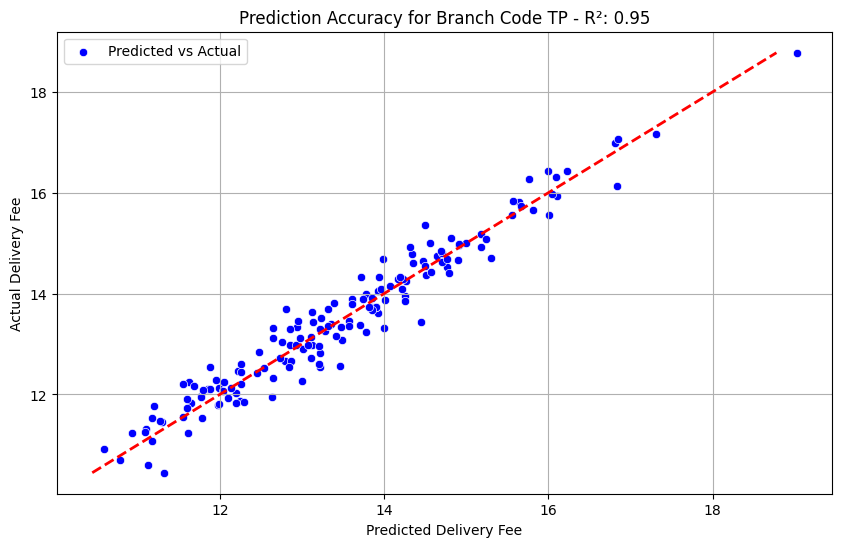

R² Score for branch BK: 0.98


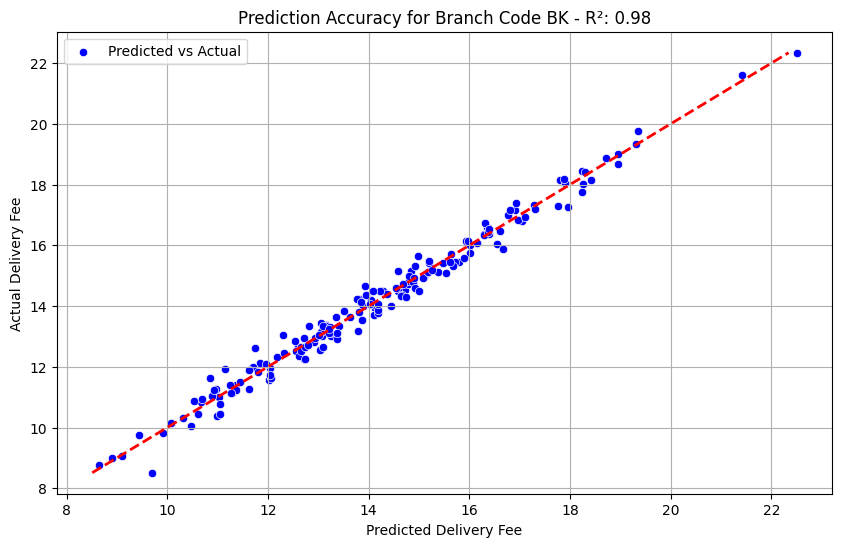

R² Score for branch NS: 0.95


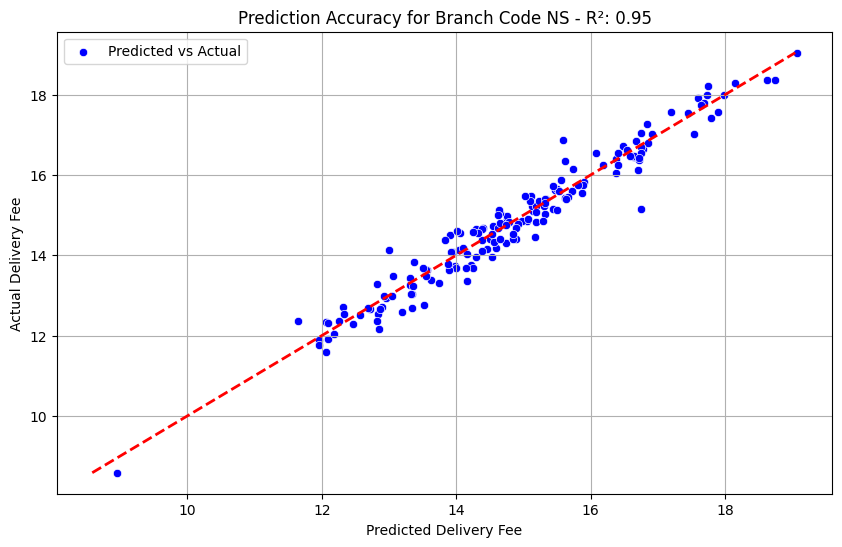

In [ ]:
# Branch codes extracted from the training data
branch_codes = data_with_full_fees['branch_code'].unique()

# Dictionary to hold models for each branch, if needed for future reference
models = {}

# Loop through each branch code
for code in branch_codes:
    # Filter training data for the current branch
    branch_data_train = data_with_full_fees[data_with_full_fees['branch_code'] == code]
    if not branch_data_train.empty:
        features_train = branch_data_train[['weekend', 'time_of_day', 'distance_to_customer_KM']]
        target_train = branch_data_train['full_fee']

        # Initialize and train the model
        model = LinearRegression()
        model.fit(features_train, target_train)
        models[code] = model  # Store the model

        # Now apply the model to the dirty_data_copy dataset for the same branch
        branch_data_test = dirty_data_copy[dirty_data_copy['branch_code'] == code]
        if not branch_data_test.empty and 'distance_to_customer_KM' in branch_data_test.columns:
            features_test = branch_data_test[['weekend', 'time_of_day', 'distance_to_customer_KM']]
            target_test = branch_data_test['full_fee']

            # Predict the delivery fees for the dirty_data_copy dataset
            predicted_fees = model.predict(features_test)

            # Calculate the R-squared value
            r2 = r2_score(branch_data_test['full_fee'], predicted_fees)
            print(f'R² Score for branch {code}: {r2:.2f}')

            # Plotting the predicted vs actual delivery fee
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=predicted_fees, y=branch_data_test['full_fee'], color='blue', label='Predicted vs Actual')
            plt.plot([branch_data_test['full_fee'].min(), branch_data_test['full_fee'].max()],
                     [branch_data_test['full_fee'].min(), branch_data_test['full_fee'].max()], 'r--', lw=2)
            plt.title(f'Prediction Accuracy for Branch Code {code} - R²: {r2:.2f}')
            plt.xlabel('Predicted Delivery Fee')
            plt.ylabel('Actual Delivery Fee')
            plt.legend()
            plt.grid(True)
            plt.show()
        else:
            print(f"No matching data found in dummy for branch code {code} or missing necessary features.")
    else:
        print(f"No training data found for branch code {code}.")


The model yields R-squared values exceeding 0.95, indicating that the data cleaning process was performed accurately.

<div class="alert alert-block alert-info">
    
### 3.4 Outlier <a class="anchor" name="outlier"></a>

To begin analysing the `outlier_data` DataFrame, first  we use the `.info()` method to get a summary of its structure. Then, we use the `.head()` method to print the first few rows of the DataFrame for a quick preview.

In [ ]:
outlier_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 500 non-null    object 
 1   date                     500 non-null    object 
 2   time                     500 non-null    object 
 3   order_type               500 non-null    object 
 4   branch_code              500 non-null    object 
 5   order_items              500 non-null    object 
 6   order_price              500 non-null    float64
 7   customer_lat             500 non-null    float64
 8   customer_lon             500 non-null    float64
 9   customerHasloyalty?      500 non-null    int64  
 10  distance_to_customer_KM  500 non-null    float64
 11  delivery_fee             500 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [ ]:
outlier_data.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDI10335,2018-09-01,15:56:37,Lunch,NS,"[('Steak', 8), ('Fries', 10), ('Burger', 2)]",542.00,-37.816775,144.954287,0,8.868,16.910411
1,ORDY01034,2018-07-26,14:45:38,Lunch,TP,"[('Chicken', 5), ('Fries', 9), ('Salad', 10)]",440.00,-37.804196,144.956930,0,9.343,13.162384
2,ORDA06486,2018-09-05,16:06:45,Dinner,BK,"[('Fish&Chips', 8), ('Shrimp', 4)]",496.00,-37.815116,144.927561,0,11.824,19.271111
3,ORDK00985,2018-02-16,09:31:16,Breakfast,BK,"[('Eggs', 5), ('Cereal', 3)]",173.00,-37.811022,144.950512,0,8.726,13.662912
4,ORDA01138,2018-07-29,14:55:46,Lunch,BK,"[('Burger', 6), ('Steak', 1)]",231.00,-37.817823,144.946251,0,9.440,18.073641
5,ORDY02911,2018-11-19,18:38:52,Dinner,TP,"[('Salmon', 3), ('Fish&Chips', 1)]",158.00,-37.819154,144.950600,0,8.843,12.505924
6,ORDZ05990,2018-02-25,09:41:24,Breakfast,NS,"[('Pancake', 10), ('Eggs', 3), ('Cereal', 3)]",371.50,-37.816412,144.955803,0,8.736,7.873536
7,ORDK03999,2018-03-30,10:52:23,Breakfast,BK,"[('Eggs', 8), ('Cereal', 5)]",281.00,-37.816239,144.964071,0,7.758,18.688671
8,ORDC10888,2018-04-05,11:02:32,Breakfast,NS,"[('Coffee', 1), ('Cereal', 3), ('Eggs', 8)]",246.50,-37.811195,145.007096,0,10.065,15.348621
9,ORDJ05134,2018-01-23,08:40:33,Breakfast,TP,"[('Cereal', 4), ('Pancake', 3)]",156.75,-37.819048,144.954168,0,8.408,11.095164


<div class="alert alert-block alert-info">
    
#### 3.4.1 Find Outlier <a class="anchor" name="find_outlier"></a>

In this section, we need to identify outliers in the delivery fee. To find the outliers, we use residual analysis approach. Residual analysis is a technique in regression models for detecting outliers and assessing the model's fit.
In our case, the delivery fee depend linearly on three variables: `weekend`, `time_of_day`, and `distance_to_customer_KM`. Residual analysis is suitable here because it helps in understanding how well the model fits the data and in identifying any patterns or anomalies in the residuals.

The approach follows these steps:


1. **Prepare the Predictors**:
   - We generate necessary predictor columns: `weekend` and `time_of_day`, which, along with `distance_to_customer_KM`, will be used to estimate delivery fees.

2. **Model Fitting**:
   - Fit a linear regression model using `weekend`, `time_of_day`, and `distance_to_customer_KM` as independent variables to predict the delivery fee.

3. **Residual Calculation and Visualization**:
   - Calculate residuals for each data point by subtracting the predicted delivery fees from the actual fees. These residuals represent the errors in predictions. Subsequently, use box plots to visually assess the distribution of these residuals and pinpoint outliers.

4. **Identify Outlier Threshold**:
   - Analyze the box plot to determine an appropriate threshold for defining outliers. This threshold will be based on the distribution of residuals, typically looking for residuals that lie significantly outside the interquartile range.

5. **Remove Outliers**:
   - Exclude data points whose residuals exceed the defined threshold, as these are considered outliers.

6. **Validation**:
   - Re-fit the linear regression model without the outliers and reevaluate the model by examining the coefficient of determination (R²).



In [ ]:
# Create the weekend column by applying the check_weekday function to the date column
outlier_data['weekend'] = outlier_data['date'].apply(check_weekday)

# Create the time_of_day column by applying the categorize_time_of_day function to the time column
outlier_data['time_of_day'] = outlier_data['time'].apply(categorize_time_of_day)

# Display first 10 rows
outlier_data.head(10)

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend,time_of_day
0,ORDI10335,2018-09-01,15:56:37,Lunch,NS,"[('Steak', 8), ('Fries', 10), ('Burger', 2)]",542.00,-37.816775,144.954287,0,8.868,16.910411,1,1
1,ORDY01034,2018-07-26,14:45:38,Lunch,TP,"[('Chicken', 5), ('Fries', 9), ('Salad', 10)]",440.00,-37.804196,144.956930,0,9.343,13.162384,0,1
2,ORDA06486,2018-09-05,16:06:45,Dinner,BK,"[('Fish&Chips', 8), ('Shrimp', 4)]",496.00,-37.815116,144.927561,0,11.824,19.271111,0,2
3,ORDK00985,2018-02-16,09:31:16,Breakfast,BK,"[('Eggs', 5), ('Cereal', 3)]",173.00,-37.811022,144.950512,0,8.726,13.662912,0,0
4,ORDA01138,2018-07-29,14:55:46,Lunch,BK,"[('Burger', 6), ('Steak', 1)]",231.00,-37.817823,144.946251,0,9.440,18.073641,1,1
5,ORDY02911,2018-11-19,18:38:52,Dinner,TP,"[('Salmon', 3), ('Fish&Chips', 1)]",158.00,-37.819154,144.950600,0,8.843,12.505924,0,2
6,ORDZ05990,2018-02-25,09:41:24,Breakfast,NS,"[('Pancake', 10), ('Eggs', 3), ('Cereal', 3)]",371.50,-37.816412,144.955803,0,8.736,7.873536,1,0
7,ORDK03999,2018-03-30,10:52:23,Breakfast,BK,"[('Eggs', 8), ('Cereal', 5)]",281.00,-37.816239,144.964071,0,7.758,18.688671,0,0
8,ORDC10888,2018-04-05,11:02:32,Breakfast,NS,"[('Coffee', 1), ('Cereal', 3), ('Eggs', 8)]",246.50,-37.811195,145.007096,0,10.065,15.348621,0,0
9,ORDJ05134,2018-01-23,08:40:33,Breakfast,TP,"[('Cereal', 4), ('Pancake', 3)]",156.75,-37.819048,144.954168,0,8.408,11.095164,0,0


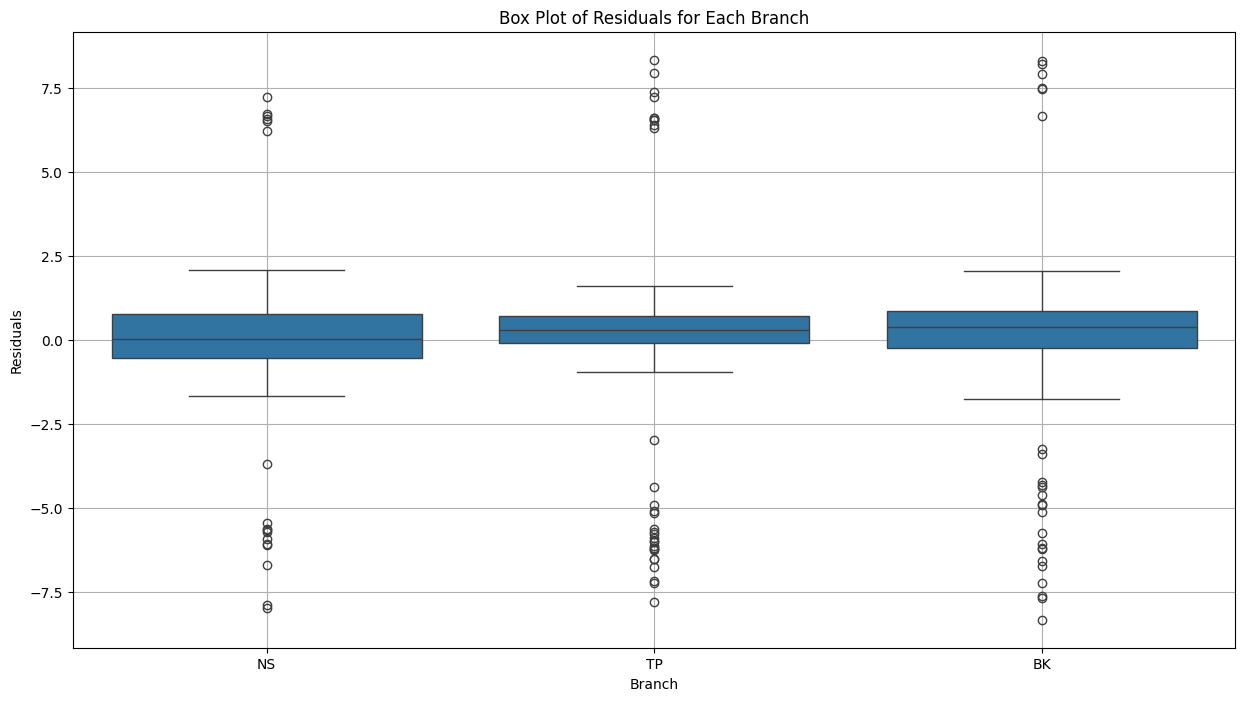

In [ ]:
# Define the features and target
features_columns = ['weekend', 'time_of_day', 'distance_to_customer_KM']
target_column = 'delivery_fee'

residuals_data = pd.DataFrame()

# Iterate over each branch
for branch in outlier_data['branch_code'].unique():
    # Subset data for the current branch
    branch_data = outlier_data[outlier_data['branch_code'] == branch]

    # Define the features and target for the current branch
    features = branch_data[features_columns]
    target = branch_data[target_column]

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(features, target)

    # Predict the delivery fees
    predicted = model.predict(features)

    # Calculate residuals as the difference between actual and predicted delivery fees
    residuals = target - predicted

    # Add residuals and branch labels to the DataFrame
    branch_residuals = pd.DataFrame({
        'Residuals': residuals,
        'Branch': branch
    })
    residuals_data = pd.concat([residuals_data, branch_residuals])

# Plotting the residuals box plot for each branch
plt.figure(figsize=(15, 8))
sns.boxplot(x='Branch', y='Residuals', data=residuals_data)
plt.title('Box Plot of Residuals for Each Branch')
plt.xlabel('Branch')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


Based on this plot, we set the thresholds at -3 and 3 for outlier detection.
This code below, we fit a linear regression model for each branch within a dataset to predict delivery fees based on `weekend`, `time_of_day`, and `distance_to_customer_KM`. After modeling, we also plot some visualisations to evaluate our decision.

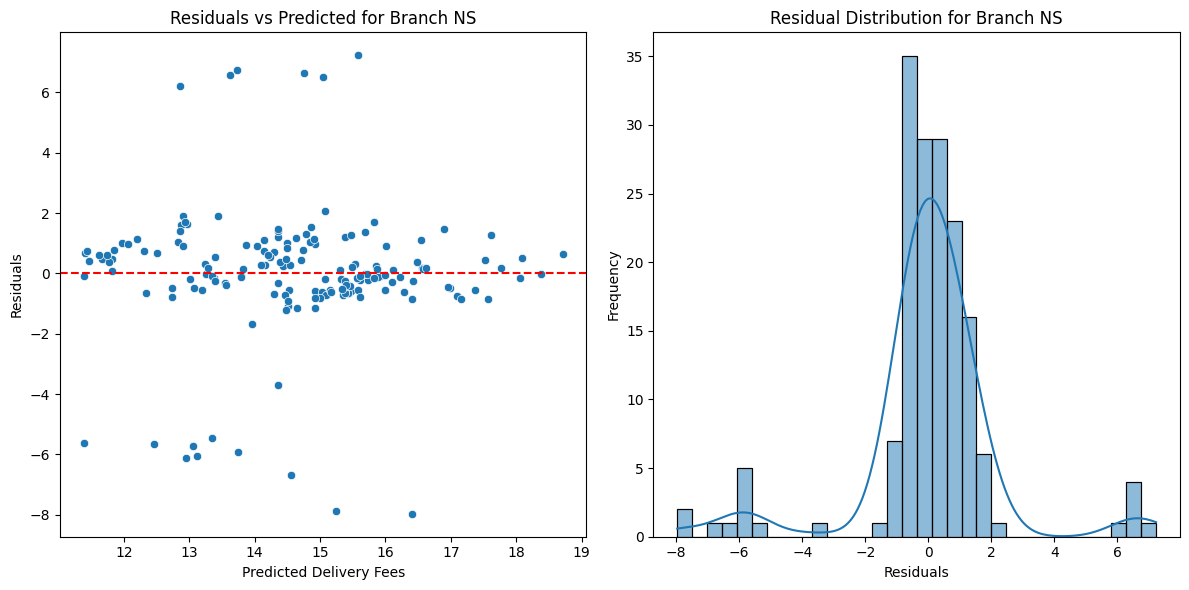

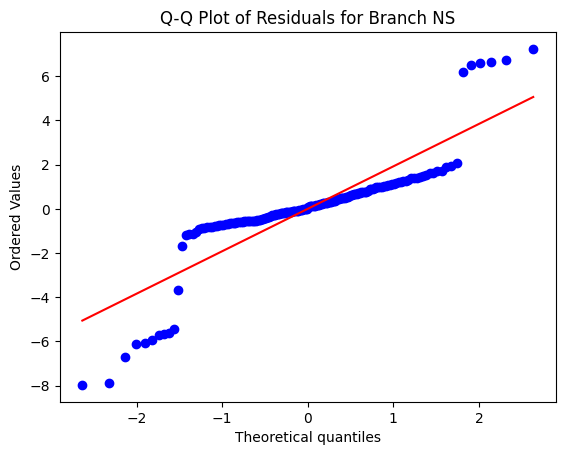

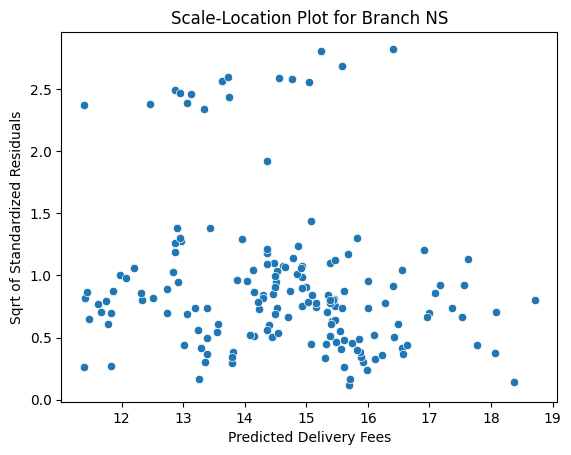

Branch NS - Coefficient of Determination (R²): 0.35147704636804267


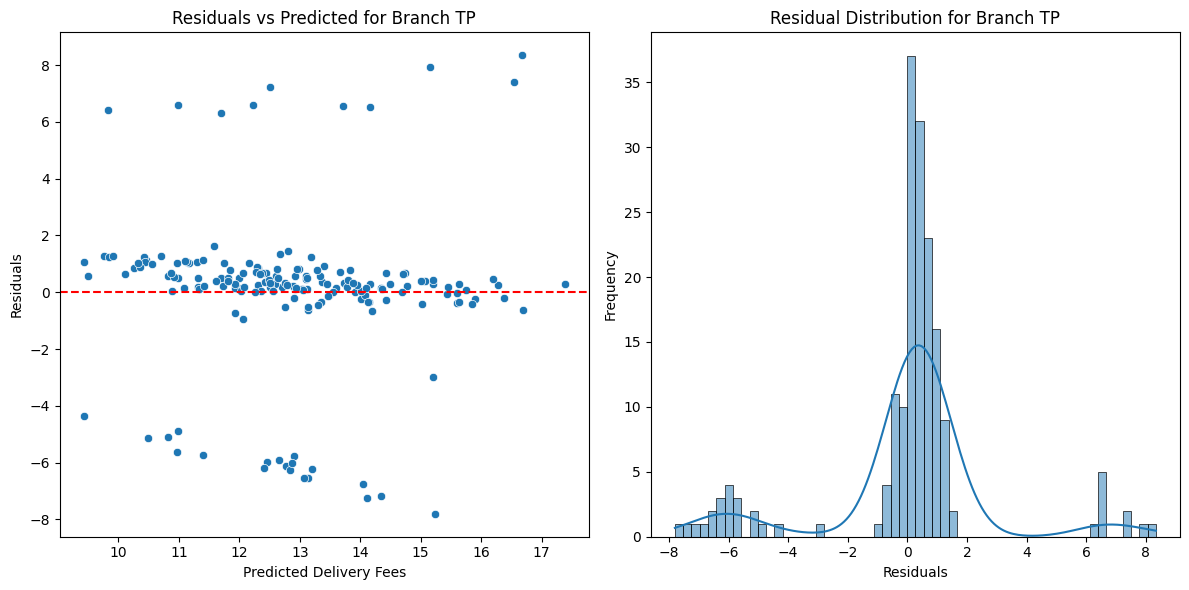

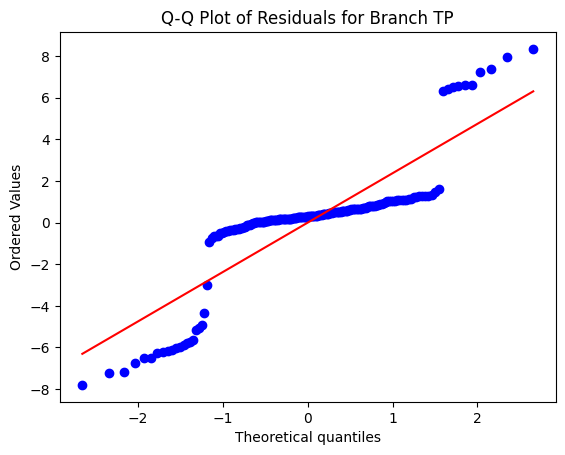

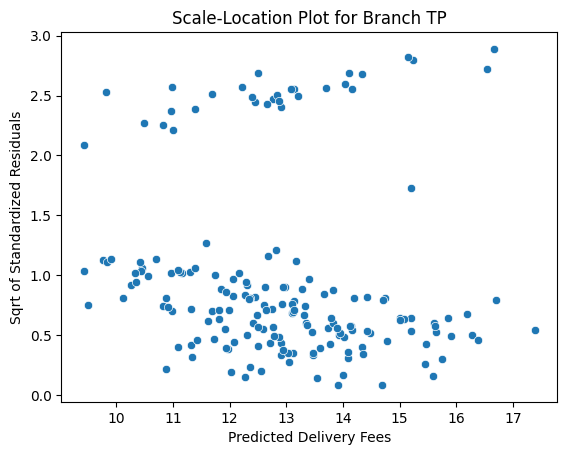

Branch TP - Coefficient of Determination (R²): 0.2728439665849878


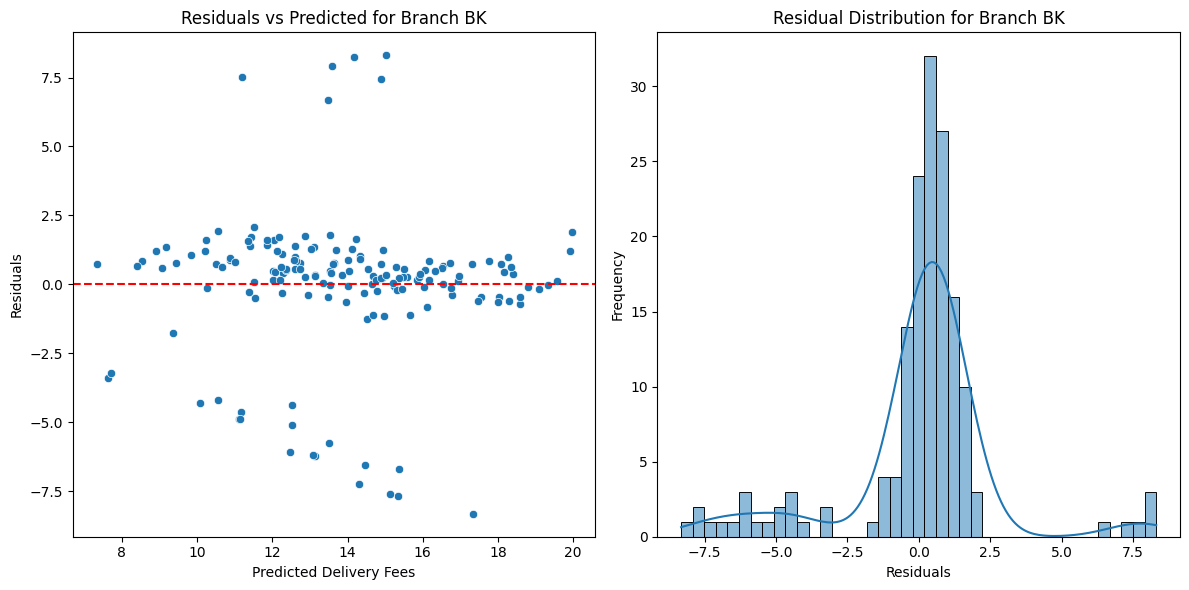

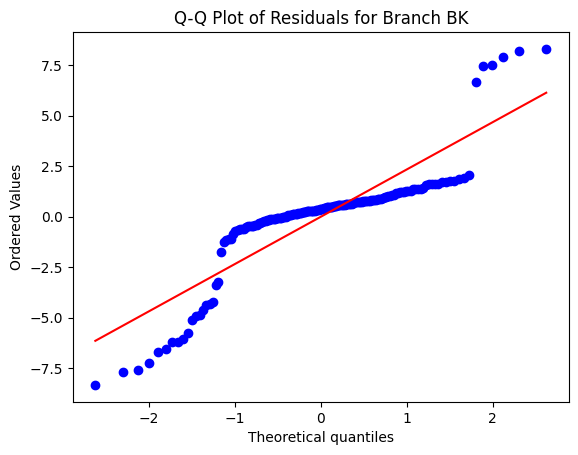

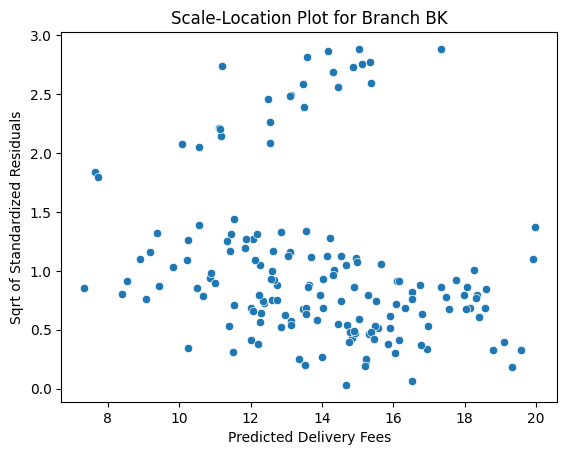

Branch BK - Coefficient of Determination (R²): 0.5155402198720986


In [ ]:
# Get unique branch codes
branches = outlier_data['branch_code'].unique()

outliers_by_branch = {}
r_squared_by_branch = {}

for branch_code in branches:
    # Filter data for the current branch
    branch_data = outlier_data[outlier_data['branch_code'] == branch_code]

    # Define features and target
    features = branch_data[['weekend', 'time_of_day', 'distance_to_customer_KM']]
    target = branch_data['delivery_fee']

    # Fit model and calculate residuals
    model = LinearRegression()
    model.fit(features, target)
    predicted = model.predict(features)
    residuals = target - predicted
    r_squared = r2_score(target, predicted)

    # Store R² score for the branch
    r_squared_by_branch[branch_code] = r_squared

    # Identify outliers based on residuals
    outliers = branch_data[(residuals < -3) | (residuals > 3)]
    outliers_by_branch[branch_code] = outliers

    # Plotting residuals against predicted values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=predicted, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residuals vs Predicted for Branch {branch_code}')
    plt.xlabel('Predicted Delivery Fees')
    plt.ylabel('Residuals')

    # Histogram of residuals
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, kde=True)
    plt.title(f'Residual Distribution for Branch {branch_code}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Display plots
    plt.tight_layout()
    plt.show()

    # Q-Q plot
    plt.figure()
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Residuals for Branch {branch_code}')
    plt.show()

    # Scale-location plot (sqrt of the standardized residuals vs predicted)
    plt.figure()
    standardized_residuals = np.sqrt(np.abs(residuals))
    sns.scatterplot(x=predicted, y=standardized_residuals)
    plt.title(f'Scale-Location Plot for Branch {branch_code}')
    plt.xlabel('Predicted Delivery Fees')
    plt.ylabel('Sqrt of Standardized Residuals')
    plt.show()

    print(f"Branch {branch_code} - Coefficient of Determination (R²): {r_squared}")



From these plots, we can see that the threshold at ±3 captures the most extreme residuals. This threshold also supported by the residual distribution, as the majority of residuals fall within this range.
In the code below , we print each outlier data based on branch code.

In [ ]:
# Print outliers by branch
for branch_code, outliers in outliers_by_branch.items():
    outlier_count = outliers.shape[0]
    print(f"Branch {branch_code} - Outliers detected: {outlier_count}")
    print(outliers)

Branch NS - Outliers detected: 17
      order_id        date      time order_type branch_code  \
6    ORDZ05990  2018-02-25  09:41:24  Breakfast          NS   
46   ORDZ02817  2018-07-27  14:45:38      Lunch          NS   
70   ORDI00013  2018-06-13  13:24:30      Lunch          NS   
157  ORDI05183  2018-10-31  17:58:18     Dinner          NS   
158  ORDZ02296  2018-07-24  14:45:38      Lunch          NS   
184  ORDC00776  2018-06-24  13:44:47      Lunch          NS   
185  ORDI07915  2018-01-13  08:20:16  Breakfast          NS   
242  ORDC05139  2018-07-21  14:35:29      Lunch          NS   
252  ORDZ04368  2018-05-05  12:03:22      Lunch          NS   
270  ORDI07867  2018-04-16  11:22:49  Breakfast          NS   
325  ORDZ03982  2018-10-08  17:17:44     Dinner          NS   
412  ORDZ00816  2018-01-15  08:20:16  Breakfast          NS   
448  ORDI01472  2018-01-03  08:00:00  Breakfast          NS   
464  ORDC03473  2018-01-02  08:00:00  Breakfast          NS   
480  ORDI02369  2018-

<div class="alert alert-block alert-info">
    
#### 3.4.2 Remove Outlier and Validate Outlier Solution <a class="anchor" name="remove_outlier"></a>


In this section, we remove outlier data based on the threshold of residuals. We then plot the linear regression and calculate the R² score to validate the effectiveness of our approach. This high R² score validates the our approach in removing outlier for the delivery fee.



Branch NS - Coefficient of Determination (R²): 0.9664884336516665


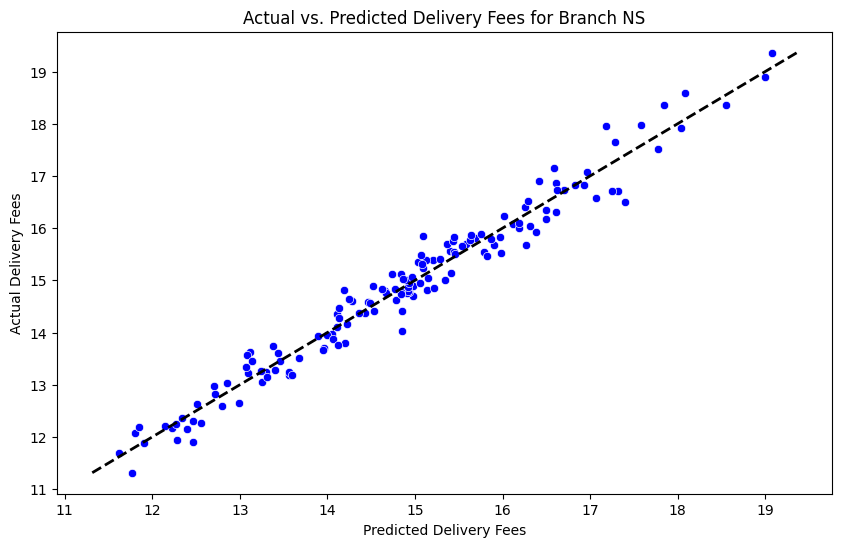

Branch TP - Coefficient of Determination (R²): 0.9567317271510654


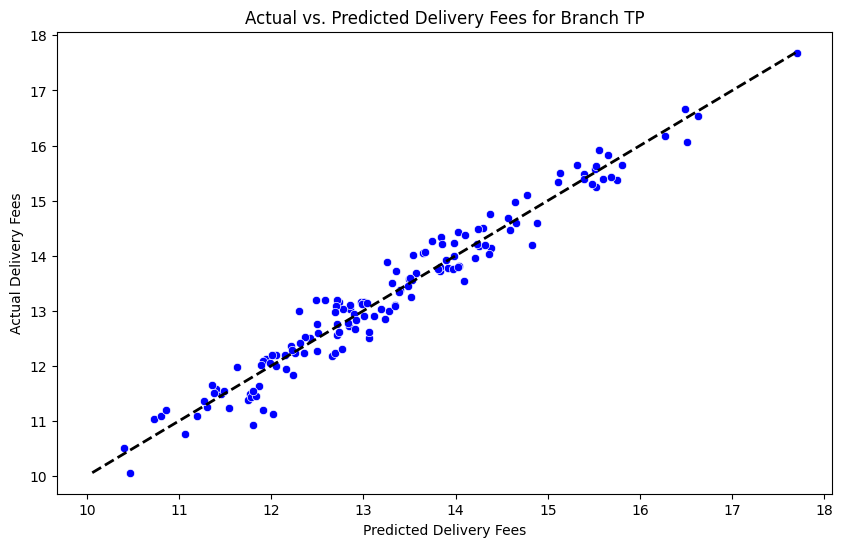

Branch BK - Coefficient of Determination (R²): 0.9753657834121892


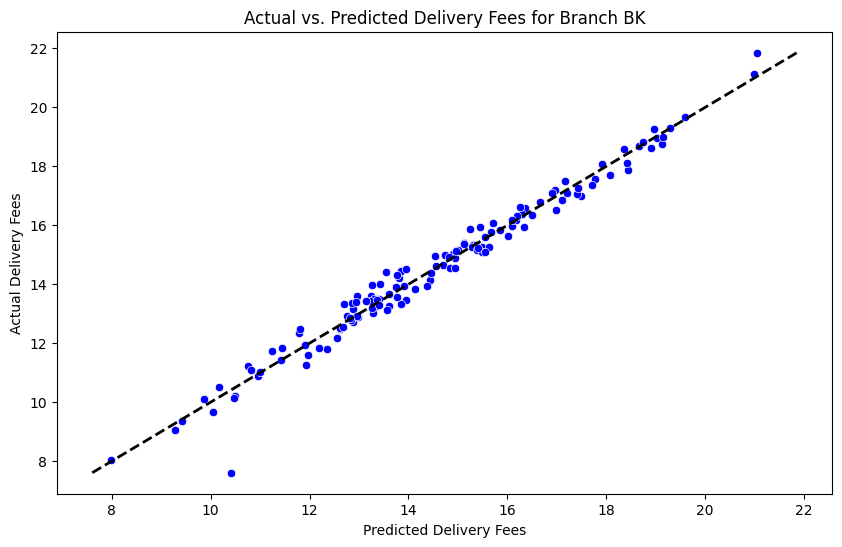

In [ ]:
branches = outlier_data['branch_code'].unique()

outliers_by_branch = {}
r_squared_by_branch = {}
clean_data = outlier_data.copy()

for branch_code in branches:
    while True:
        # Filter data for the current branch
        branch_data = clean_data[clean_data['branch_code'] == branch_code]

        # Define features and target
        features = branch_data[['weekend', 'time_of_day', 'distance_to_customer_KM']]
        target = branch_data['delivery_fee']

        # Create and fit a linear regression model
        model = LinearRegression()
        model.fit(features, target)

        # Predict delivery fee
        predicted = model.predict(features)

        # Calculate residuals
        residuals = target - predicted

        # R score
        r_squared = r2_score(target, predicted)
        r_squared_by_branch[branch_code] = r_squared

        # Outlier detection
        outliers = residuals[(residuals < -3) | (residuals > 3)]

        if outliers.empty:
            break

        # Store indices of detected outliers
        outliers_by_branch[branch_code] = outliers.index

        # Remove outliers from the data
        clean_data = clean_data.drop(outliers.index)
    print(f"Branch {branch_code} - Coefficient of Determination (R²): {r_squared}")

    # Plotting the results
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=predicted, y=target, color='blue')
    plt.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=2)
    plt.title(f'Actual vs. Predicted Delivery Fees for Branch {branch_code}')
    plt.xlabel('Predicted Delivery Fees')
    plt.ylabel('Actual Delivery Fees')
    plt.show()

<div class="alert alert-block alert-info">
    
### 3.5 Export to CSV <a class="anchor" name="export"></a>

In this section, we export three files into csv.

In [ ]:
# Dirty Data File
# Drop Unused Column
cleaned_dirty_data = dirty_data_copy.drop(columns = ['weekend', 'time_of_day', 'predicted_delivery_fee', 'percent_difference', 'full_fee'])

# Export the cleaned data to a CSV file
cleaned_dirty_data.to_csv('005_dirty_data_solution.csv', index = False)

print("The cleaned data has been exported to '005_dirty_data_solution.csv'")

The cleaned data has been exported to '005_dirty_data_solution.csv'


In [ ]:
# Missing Data File
# Drop Unused Column
imputed_missing_df = imputed_missing_df.drop(columns=['weekend', 'time_of_day', 'full_fee'])
# Export to CSV
imputed_missing_df.to_csv('005_missing_data_solution.csv', index=False)

print("The imputed_missing_df has been exported to '005_missing_data_solution.csv'.")

The imputed_missing_df has been exported to '005_missing_data_solution.csv'.


In [ ]:
# Outlier Data File
# Drop Unused Column
clean_data = clean_data.drop(columns=['weekend', 'time_of_day'])

# Export the cleaned data to a CSV file
clean_data.to_csv('005_outlier_data_solution.csv', index=False)

print("The cleaned data has been exported to '005_outlier_data_solution.csv'")

The cleaned data has been exported to '005_outlier_data_solution.csv'


<div class="alert alert-block alert-warning">

## 4. Task 2 <a class="anchor" name="task_2"></a>
    
</div>

<div class="alert alert-block alert-info">
    
### 4.1 Load Data <a class="anchor" name="load_data_2"></a>

First, we load the data file suburb_info.xlsx to a dataframe.

In [ ]:
suburb_info = pd.read_excel('/content/drive/Shareddrives/FIT5196_S1_2024/A2/supplementary_data/suburb_info.xlsx')
suburb_info.head(10)

,suburb,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,ABBOTSFORD,2304,4706,Yarra,68%,"$1,797","$1,299,400",4025
1,ABERFELDIE,1410,453,Moonee Valley,81%,"$1,571","$1,926,600",22442
2,ALBANVALE,1897,138,Brimbank,46%,$907,"$594,200",54005
3,ALBION,1389,1392,Brimbank,52%,$929,"$739,100",30677
4,ALPHINGTON,1729,1099,Darebin,73%,"$1,538","$1,729,600",9227
5,ALTONA,4843,2394,Hobsons Bay,70%,"$1,160","$1,139,500",11742
6,ALTONA NORTH,5002,1622,Hobsons Bay,52%,$910,"$935,500",12830
7,ARDEER,1263,335,Brimbank,46%,$895,"$663,400",10176
8,ARMADALE,2838,3841,Stonnington,73%,"$1,713","$1,925,900",8428
9,ASHWOOD,2378,1176,Monash,73%,"$1,469","$1,436,500",12420


First,  we use the `.info()` method to get a summary of its structure.

In [ ]:
suburb_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   suburb              202 non-null    object
 1   number_of_houses    202 non-null    int64 
 2   number_of_units     202 non-null    int64 
 3   municipality        202 non-null    object
 4   aus_born_perc       202 non-null    object
 5   median_income       202 non-null    object
 6   median_house_price  202 non-null    object
 7   population          202 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 12.8+ KB


<div class="alert alert-block alert-info">
    
### 4.2 Data Cleaning and Observation <a class="anchor" name="clean_data_observe"></a>

Before we start the transformation, we initially clean and observe the natural of the data. This involves 5 steps as follows:

1. Clean the data by removing unwanted characters from the `aus_born_perc`, `median_income`, and `median_house_price` columns and converting these columns to the appropriate data types. For instance, we remove the '%' symbol from `aus_born_perc` and convert the column to a float. Similarly, we remove '$' and commas from `median_income` and `median_house_price` and convert them to floats.


2. Display basic statistical information for all columns using the `.describe()` method, providing insights into the central tendency, dispersion, and shape of the data distribution.


3. Visualize the distributions of all numeric features using histograms. This helps us understand the frequency distribution of each feature and identify any potential skewness or outliers.


4. Create box plots for each numeric feature to visualize their spread and identify any potential outliers. Box plots provide a summary of the data distribution, highlighting the median, quartiles, and outliers.

5. Create scatter plots to examine the relationships between each numeric feature and the target variable, `median_house_price`. The scatter plots help us visualize any potential correlations or patterns between the features and the target variable.


Data Description:
       number_of_houses  number_of_units  aus_born_perc  median_income  \
count        202.000000       202.000000     202.000000     202.000000   
mean        4155.767327      2480.410891      68.366337    1387.935644   
std         3400.864988      3132.684712      10.761293     317.841321   
min          283.000000        60.000000      36.000000     633.000000   
25%         1973.500000       620.500000      62.000000    1182.250000   
50%         3256.500000      1603.000000      70.000000    1393.000000   
75%         5518.500000      3089.000000      77.000000    1560.000000   
max        23338.000000     24380.000000      88.000000    2352.000000   

       median_house_price    population  
count        2.020000e+02    202.000000  
mean         1.218817e+06  18659.311881  
std          4.716807e+05   9604.187282  
min          5.072000e+05    170.000000  
25%          8.706750e+05  12063.000000  
50%          1.134500e+06  17583.000000  
75%          1.46755

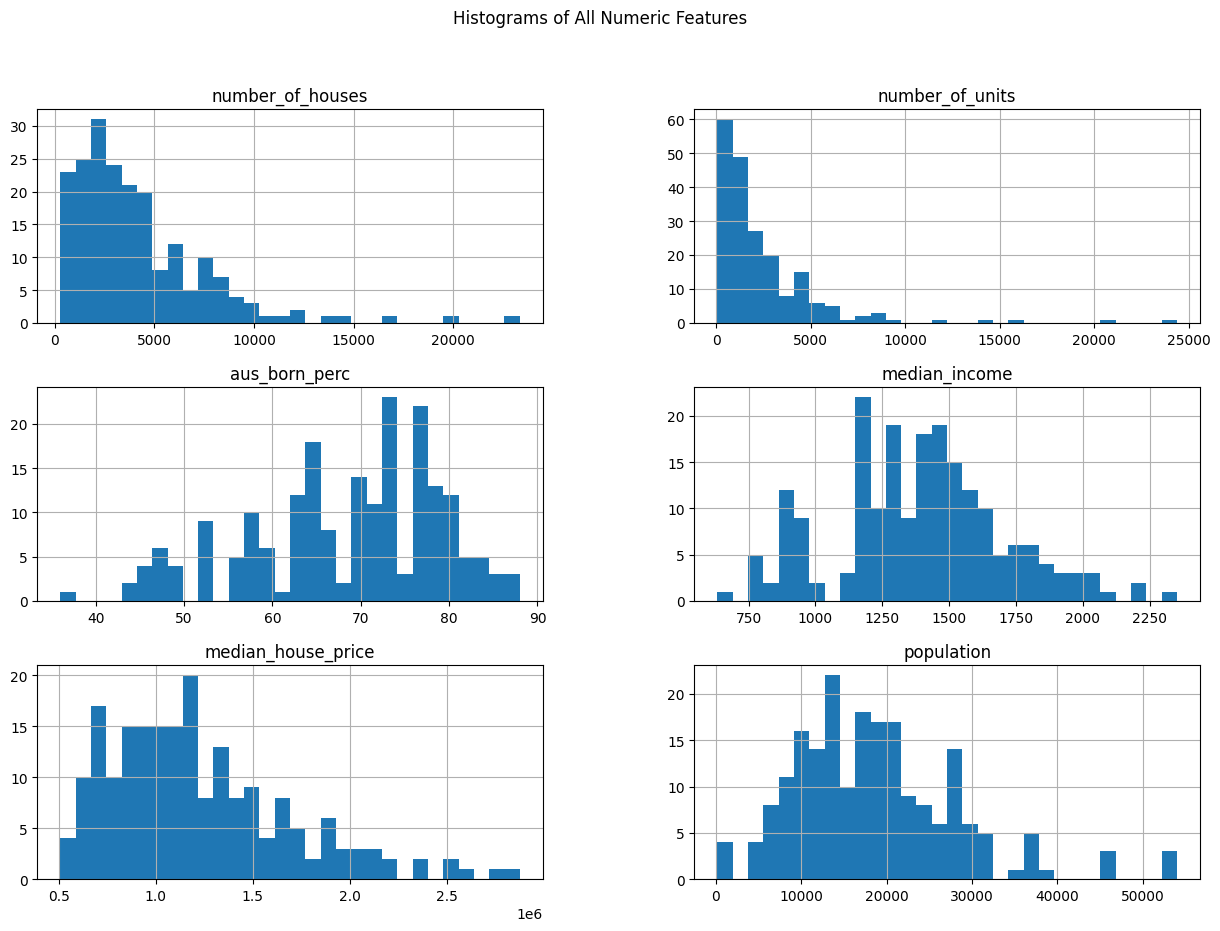

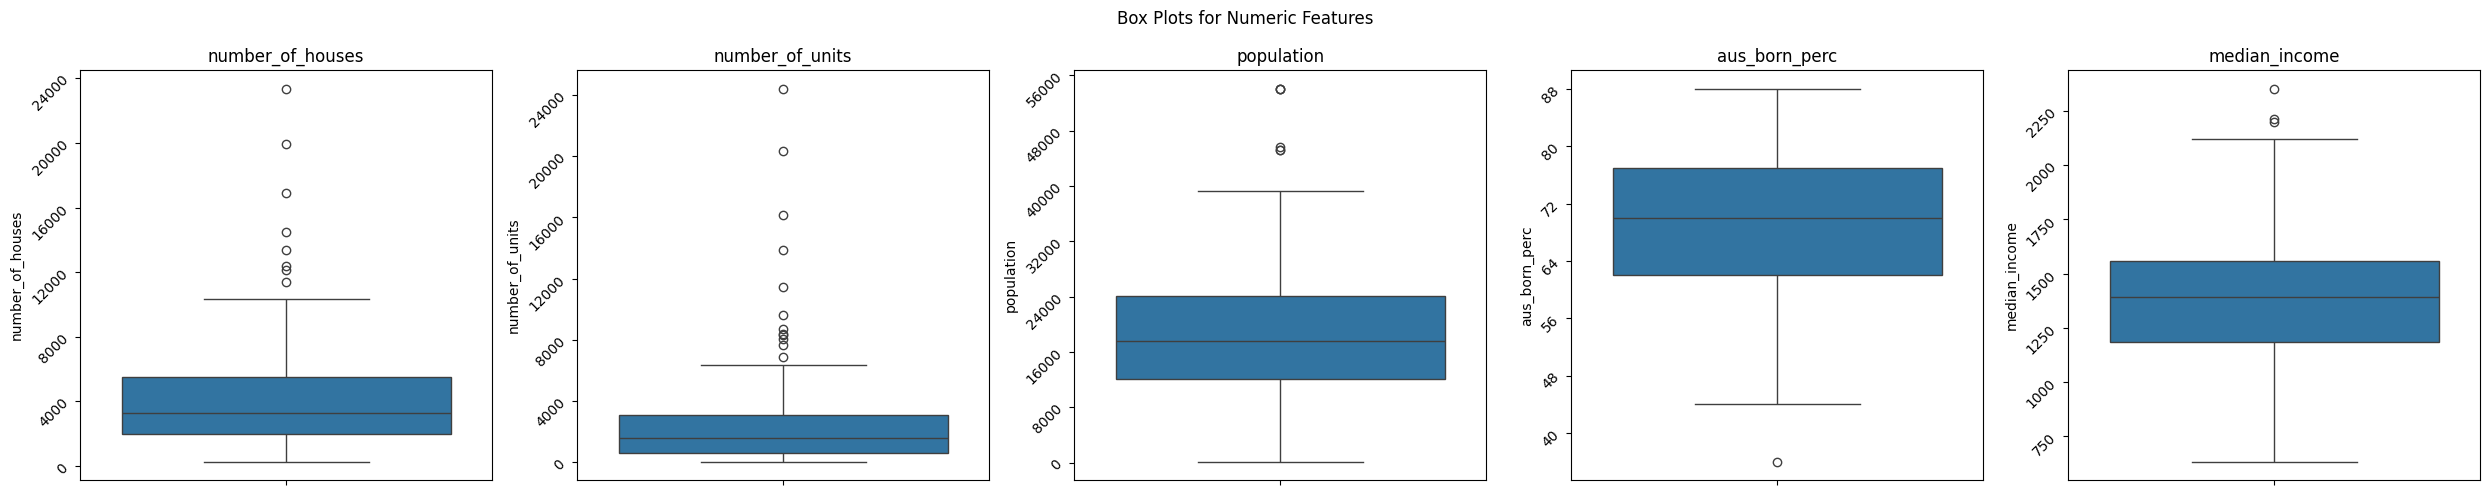

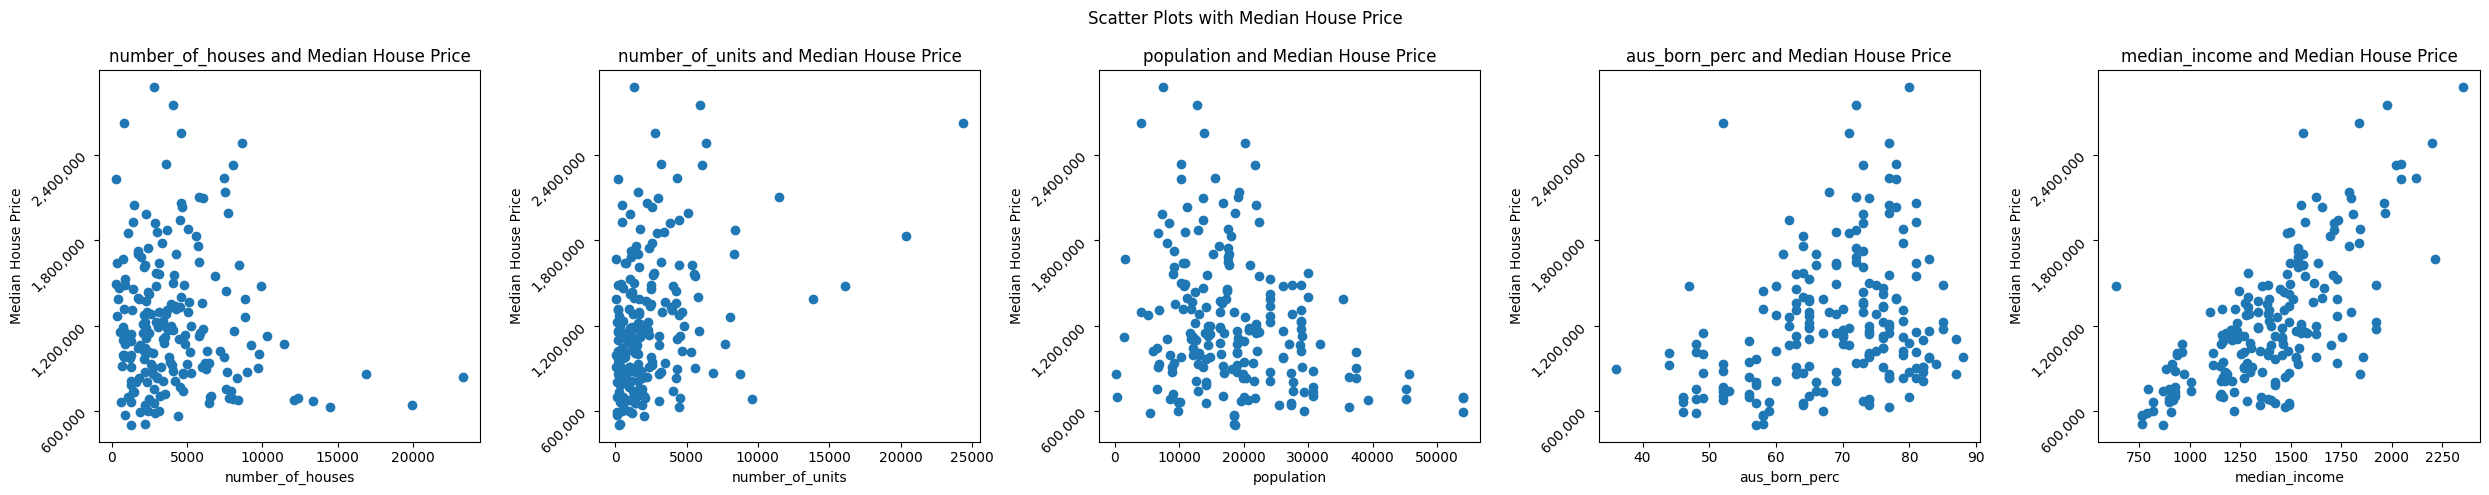

In [ ]:
numeric_columns = ['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income']

# Clean data by removing unwanted characters and converting types
suburb_info['aus_born_perc'] = suburb_info['aus_born_perc'].str.replace('%', '').astype(float)
suburb_info['median_income'] = suburb_info['median_income'].str.replace('[$,]', '', regex=True).astype(float)
suburb_info['median_house_price'] = suburb_info['median_house_price'].str.replace('[$,]', '', regex=True).astype(float)

# Display basic information and statistics
print("\nData Description:")
print(suburb_info.describe())

# Visualize distributions of all numeric features
suburb_info.hist(bins=30, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Histograms of All Numeric Features')
plt.show()

# Box plots for numeric features
numeric_columns = ['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income']
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle('Box Plots for Numeric Features')

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=suburb_info[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].yaxis.set_major_locator(ticker.MaxNLocator(8))
    axes[i].tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.show()

# Function to format y-axis labels as integers
def int_formatter(x, pos):
    return f'{int(x):,}'

# Scatter plots to examine relationships with the target variable 'median_house_price'
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle('Scatter Plots with Median House Price')

for i, col in enumerate(numeric_columns):
    axes[i].scatter(suburb_info[col], suburb_info['median_house_price'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Median House Price')
    axes[i].set_title(f'{col} and Median House Price')
    axes[i].yaxis.set_major_locator(ticker.MaxNLocator(5))
    axes[i].tick_params(axis='y', rotation=45)
    axes[i].yaxis.set_major_formatter(FuncFormatter(int_formatter))

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    
### 4.3 Data Transformation/Normalisation <a class="anchor" name="transform"></a>

Once the data is cleaned and we observe the pattern of the data, we are ready to start the transformation process. We first specify the columns that we want to transform for developing a linear regression model, including `number_of_houses`, `number_of_units`, `population`, `aus_born_perc`, and `median_income`. We then create copies of the original DataFrame for each type of transformation to ensure that the transformations are applied independently.

Next, we apply different normalisation/transformation techniques to different DataFrames we create earlier. This includes

1. **Standardization**: This transformation scales the data to have a mean of 0 and a standard deviation of 1, which is useful for many machine learning algorithms that assume the data is normally distributed.
2. **Min-Max Scaling**: This transformation scales the data to a specified range, typically [0, 1], ensuring that all features contribute equally to the model.
3. **Log Transformation**: This transformation is used to handle skewed data by reducing skewness and making the data distribution more symmetric. It is only applied to columns that do not contain zero or negative values.
4. **Power Transformation**: This transformation aims to make the data more Gaussian-like. It is similar to the Box-Cox transformation but can handle zero and negative values.
5. **Box-Cox Transformation**: This transformation requires all values to be positive, so we filter out non-positive values before applying the transformation. It stabilizes variance and makes the data more normally distributed.



In [ ]:
# Define the columns
columns_to_transform = ['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income']

suburb_info_transformed = suburb_info.copy()

# DataFrame for each transformation
df_standardized = suburb_info_transformed.copy()
df_normalized = suburb_info_transformed.copy()
df_logged = suburb_info_transformed.copy()
df_power_transformed = suburb_info_transformed.copy()
df_boxcox = suburb_info_transformed.copy()

# Apply StandardScaler
scaler = StandardScaler()
df_standardized[columns_to_transform] = scaler.fit_transform(df_standardized[columns_to_transform])

# Apply MinMaxScaler
min_max_scaler = MinMaxScaler()
df_normalized[columns_to_transform] = min_max_scaler.fit_transform(df_normalized[columns_to_transform])

# Apply log transformation to all specified columns that do not contain zero or negative values
df_logged[columns_to_transform] = df_logged[columns_to_transform].apply(np.log)

# Apply PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df_power_transformed[columns_to_transform] = pt.fit_transform(df_power_transformed[columns_to_transform])

# Apply Box-Cox transformation
for col in columns_to_transform:
    # Filter out non-positive values to avoid errors with Box-Cox
    positive_values = df_boxcox[col] > 0
    df_boxcox.loc[positive_values, col], _ = boxcox(df_boxcox.loc[positive_values, col])


<div class="alert alert-block alert-info">
    
### 4.4 Transformation/Normalization Effect Observation <a class="anchor" name="transform_effect"></a>

Next, we plot the histograms of each column before and after transformation to visualize the changes in the distribution. We create subplots to compare the original data with each transformed version side by side.



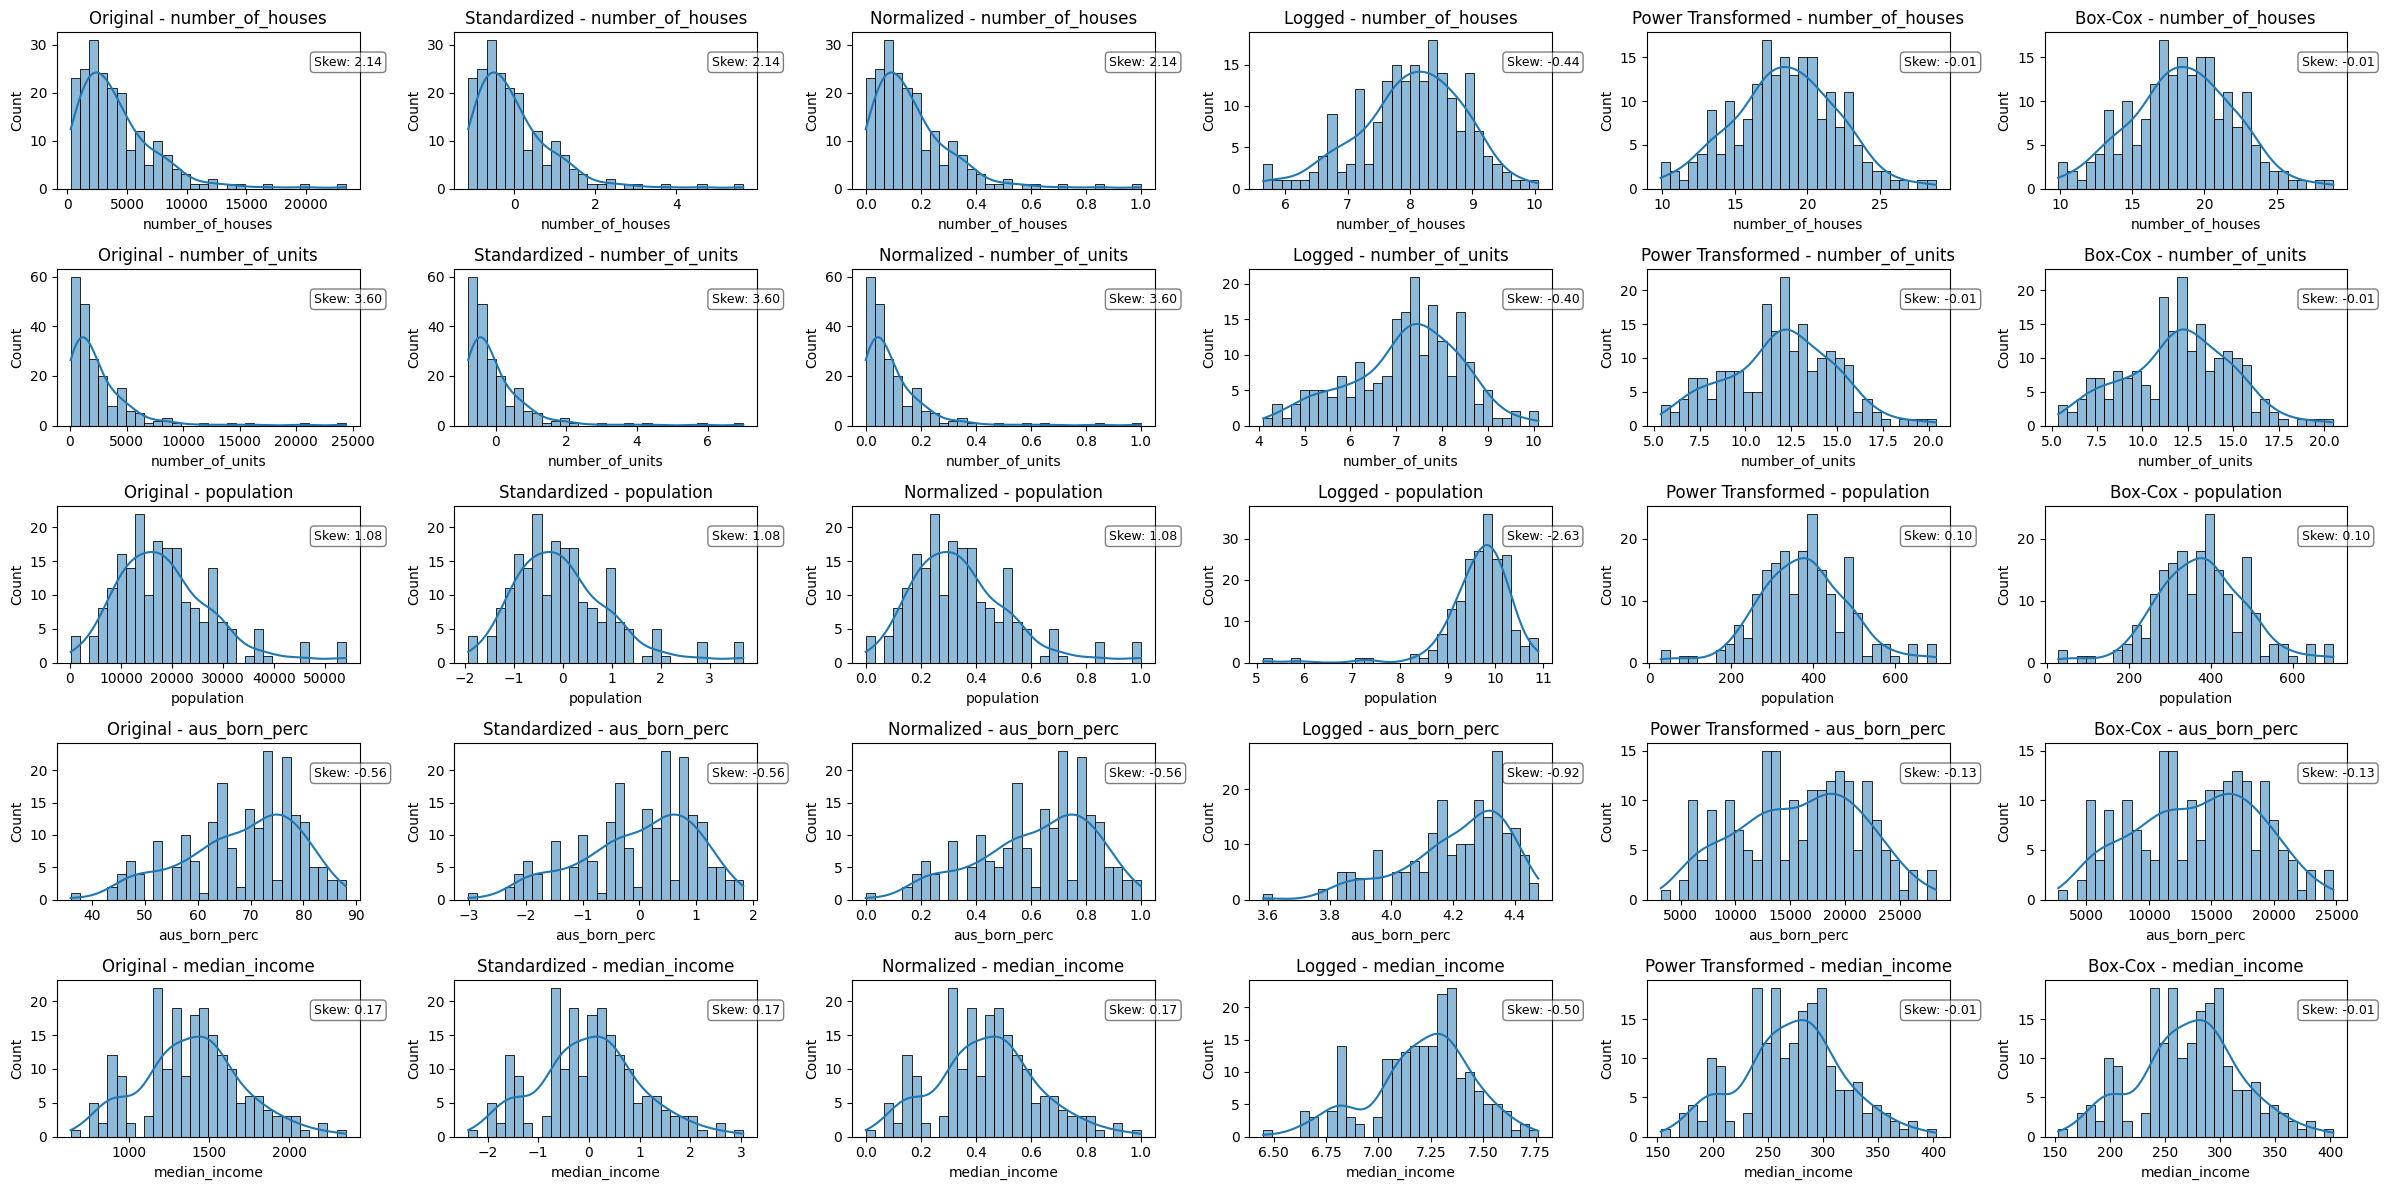

In [ ]:
fig, axes = plt.subplots(len(columns_to_transform), 6, figsize=(24, 12))

# Titles for each type of transformation
titles = ["Original", "Standardized", "Normalized", "Logged", "Power Transformed", "Box-Cox"]

# Loop through each column that needs to be transformed
for i, column in enumerate(columns_to_transform):
    # List of data frames after different transformations
    data_frames = [suburb_info_transformed, df_standardized, df_normalized, df_logged, df_power_transformed, df_boxcox]

    # Loop through each transformation and plot the histogram
    for j, (df, title) in enumerate(zip(data_frames, titles)):
        if title == "Logged" and suburb_info_transformed[column].min() <= 0:
            axes[i][j].text(0.5, 0.5, 'Skipped non-positive', horizontalalignment='center', verticalalignment='center', transform=axes[i][j].transAxes)
            axes[i][j].set_title(f'{title} - {column}')
            continue

        # Skip plotting for Box-Cox transformation if the column contains all null values
        if title == "Box-Cox" and df[column].isnull().all():
            axes[i][j].text(0.5, 0.5, 'Not applicable', horizontalalignment='center', verticalalignment='center', transform=axes[i][j].transAxes)
            axes[i][j].set_title(f'{title} - {column}')
            continue

        # Plot the histogram
        sns.histplot(df[column], ax=axes[i][j], bins=30, kde=True)
        axes[i][j].set_title(f'{title} - {column}')

        # Calculate and display the skewness of the distribution
        skewness = stats.skew(df[column].dropna())
        axes[i][j].text(0.85, 0.85, f'Skew: {skewness:.2f}', transform=axes[i][j].transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
# Display the plot
plt.show()


By plotting the histograms of each column before and after transformation, we can visually assess the impact of each transformation on the distribution of the data.

The observation of transformation results of each column is as follows:

1. `number_of_houses`: This column initially exhibits a right-skewed distribution with a skewness of 2.14, making it unsuitable for linear regression, which assumes normally distributed data for optimal performance. With Standardization and Normalization, these methods do not alter the skewness, which remained at 2.14. Thus, the data continued to be right-skewed and unsuitable for linear regression. With Log transformation, the skewness is significantly reduced to -0.44. Although this is an improvement and indicates a shift towards a more normal distribution, it is not perfect. Both Power transformation and Boxcox effectively normalized the data, bringing the skewness down to -0.01. This near-zero skewness indicates an almost perfectly normal distribution, making the data well-suited for linear regression.

2. `number_of_units`: This column initially has a pronounced right-skewed distribution with a skewness of 3.60, making it unsuitable for linear regression, which benefits from normally distributed data. Similar to column `number_of_houses`, Standardization and Normalization do not affect the skewness, which remained at 3.60. Therefore, the data continued to be right-skewed and unsuitable for linear regression. reduced the skewness to -0.40. While this represents a significant improvement towards a more normal distribution, it is still not perfect. Log transformation reduced the skewness to -0.40. While this represents a significant improvement towards a more normal distribution, it is still not perfect. Both Power transformation and Boxcox transformation successfully normalized the data, reducing the skewness to -0.01. This near-zero skewness indicates an almost perfectly normal distribution. Additionally, the x-axis values transformed to a range of 5 to 20, reflecting a stable and normalized scale.

3. `population`: This column initially exhibits a right-skewed distribution with a skewness of 1.08, which is less extreme but still not ideal for linear regression, which assumes normally distributed data. Similarly, Standardization and Normalization do not change the skewness, which remained at 1.08. Thus, the data continued to exhibit a right-skewed distribution, making it less suitable for linear regression. Log transformation significantly altered the skewness to -2.63, resulting in a left-skewed distribution. While this transformation has an impact, it overcompensates and introduces a new skewness, making the distribution still unsuitable for linear regression. Both Power transformation and Boxcox transformation effectively normalized the data, reducing the skewness to -0.10. This near-zero skewness indicates an almost perfectly normal distribution. Additionally, the x-axis values were transformed to a range of 0 to 600, reflecting a stable and normalized scale.

4. `aus_born_perc`: This column initially exhibits a slight left-skewed distribution with a skewness of -0.56, and the x-axis ranges from 0 to 100. Given the relatively minor skewness, it may already be fairly suitable for linear regression. Standardization and Normalization do not change the skewness, which remained at -0.56. Therefore, the data continued to exhibit a slight left-skew, which is generally acceptable for linear regression. Log transformation increased the skewness to -0.92, resulting in a more pronounced left-skew. This indicates that the log transformation may not be ideal, as it introduces additional skewness. Both Power transformation and Boxcox transformation effectively normalized the data, reducing the skewness to -0.13. This near-zero skewness indicates a more symmetric distribution. However, the x-axis values were transformed to a range of 5000 to 25000, which may not be as intuitive for interpretation.

5. `median_income`: This column exhibits a slight right-skewed distribution with a skewness of 0.17, and the x-axis ranges from 0 to 2000. Given the relatively minor skewness, it may already be fairly suitable for linear regression. Standardization and Normalization do not change the skewness, which remained at 0.17. Therefore, the data continued to exhibit a slight right-skew, which is generally acceptable for linear regression. Log transformation reduced the skewness to -0.50, resulting in a left-skewed distribution. While this indicates some improvement towards a more symmetric distribution, the introduced left-skew may not be ideal. Both Power transformation and Boxcox transformation effectively normalized the data, reducing the skewness to -0.10. This near-zero skewness indicates an almost perfectly normal distribution. However, the x-axis values were transformed to a range of 150 to 400, which reflects a stable and normalized scale but might affect interpretability.


<div class="alert alert-block alert-info">
    
### 4.5 Conclusion of Data Transformation/Normalization <a class="anchor" name="conclusion"></a>

Next, we plot scatter plots for several columns to illustrate the relationship between these columns and the target variable for our future linear regression model, `median_house_price`. The scatter plots reveal the most linear relationships, indicating that our chosen transformation methods for each column are reasonable. In conclusion, the appropriate transformation methods for each column are as follows:

1. `number_of_houses`: Power Transformation and Box-Cox Transformation

2. `number_of_units`: Power Transformation and Box-Cox Transformation

3. `population`: Power Transformation and Box-Cox Transformation

4. `aus_born_perc`: No transformation needed (original skewness is acceptable)

5. `median_income`: No transformation needed (original skewness is acceptable)




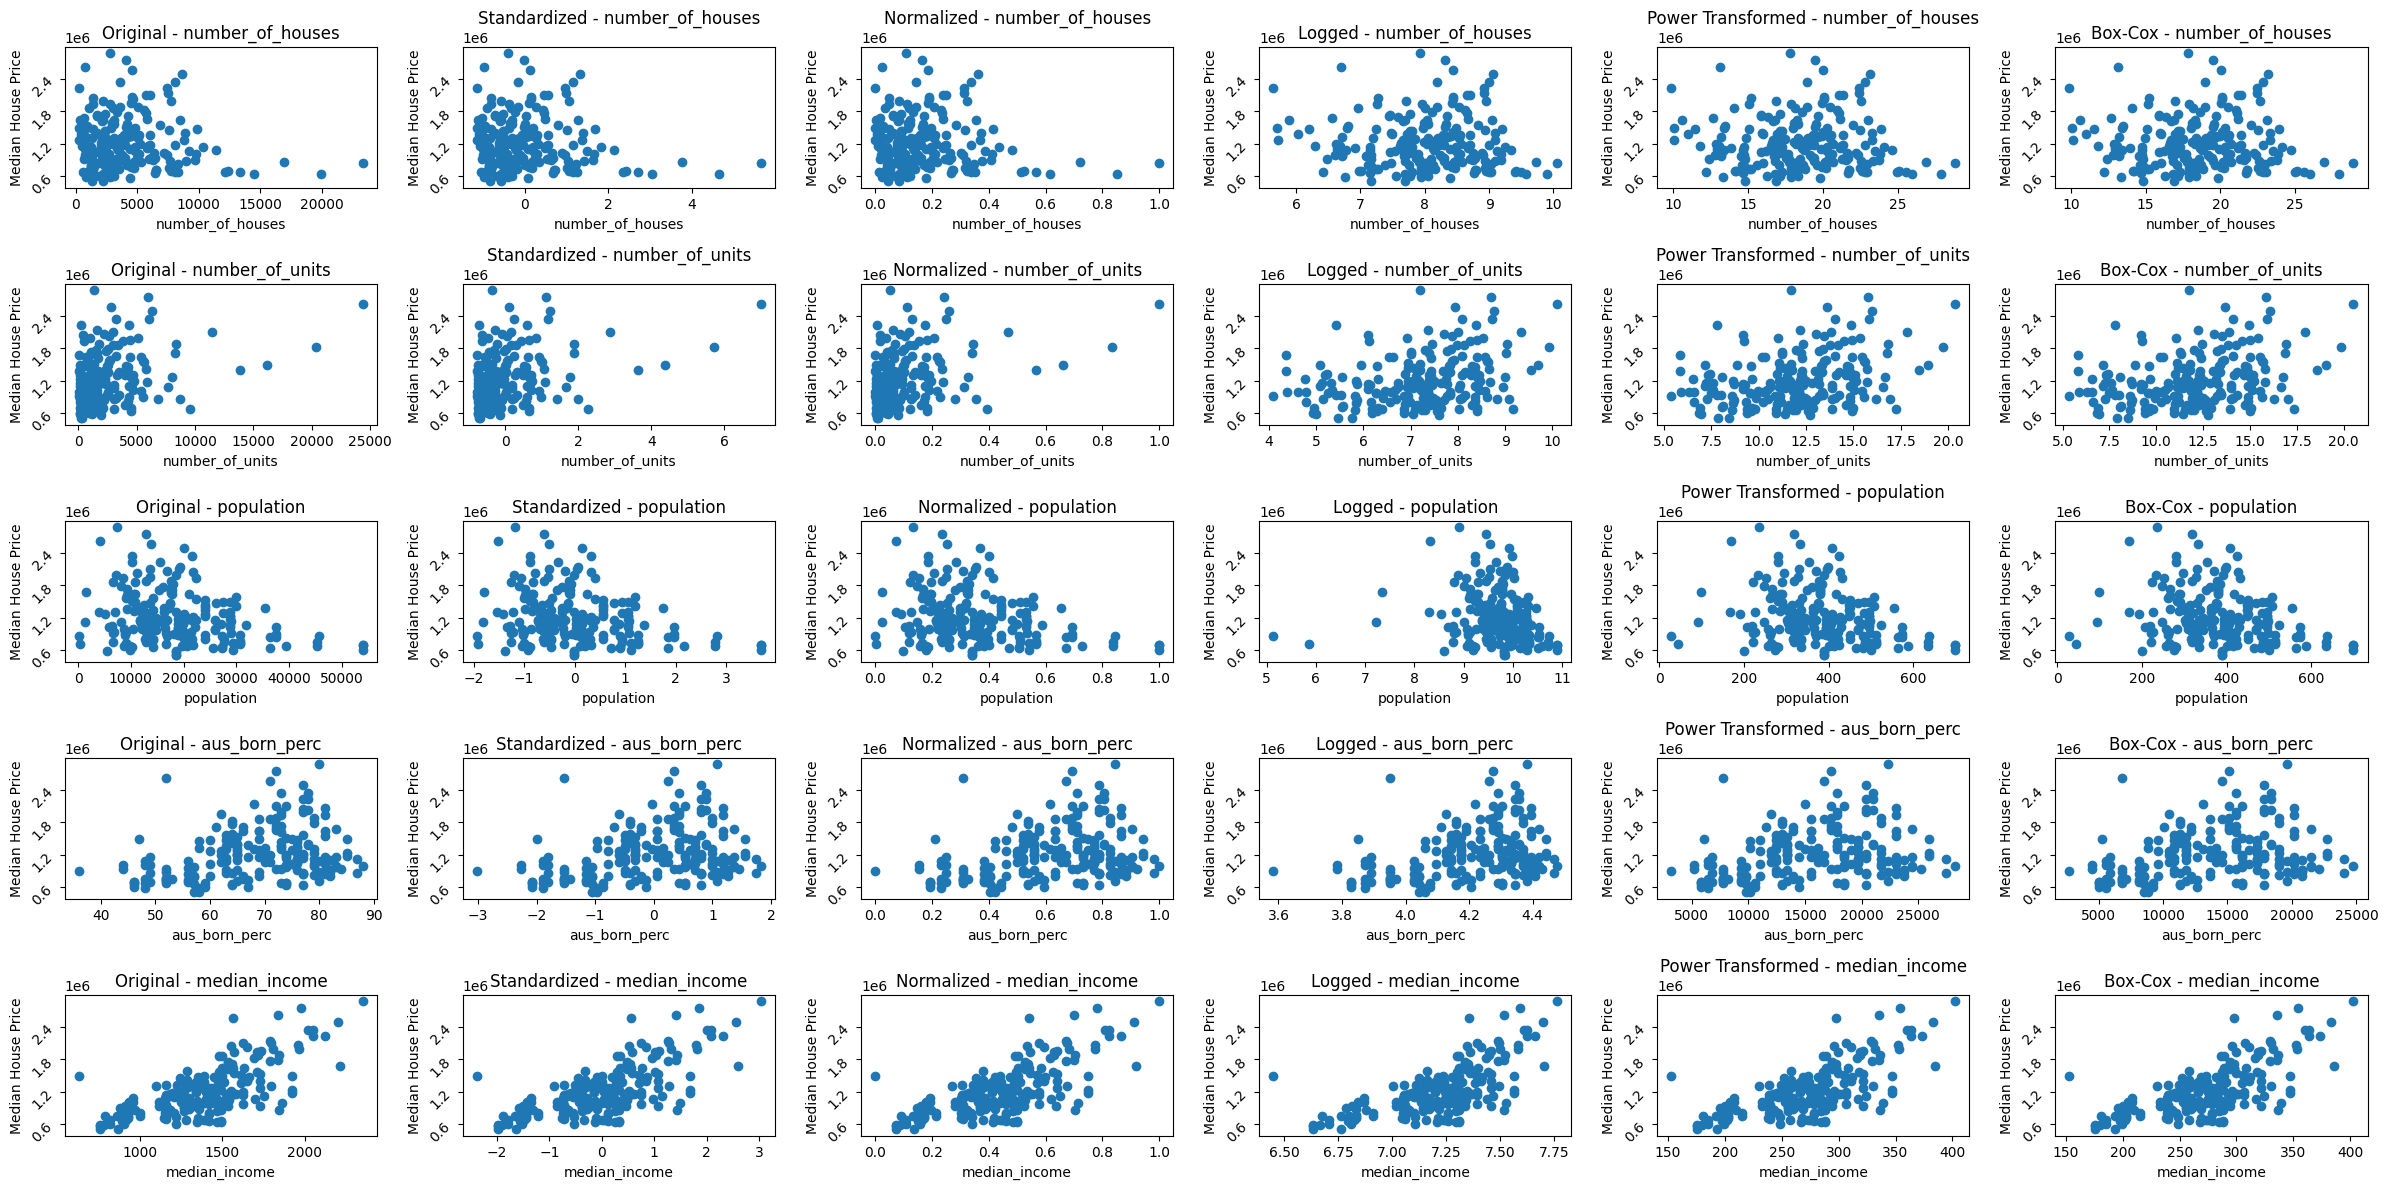

In [ ]:
# Define the list of data frames and their corresponding transformation names
data_frames = [
    (suburb_info_transformed, "Original"),
    (df_standardized, "Standardized"),
    (df_normalized, "Normalized"),
    (df_logged, "Logged"),
    (df_power_transformed, "Power Transformed"),
    (df_boxcox, "Box-Cox")
]

fig, axes = plt.subplots(len(numeric_columns), len(data_frames), figsize=(24, 12))

# Loop through each data frame and its corresponding transformation name
for j, (df, transformation_name) in enumerate(data_frames):
    # Loop through each numeric column
    for i, col in enumerate(numeric_columns):
        # Create a scatter plot for each column against median_house_price
        axes[i][j].scatter(df[col], df['median_house_price'])
        axes[i][j].set_xlabel(col)
        axes[i][j].set_ylabel('Median House Price')
        axes[i][j].set_title(f'{transformation_name} - {col}')

        axes[i][j].yaxis.set_major_locator(ticker.MaxNLocator(5))
        axes[i][j].tick_params(axis='y', rotation=45)

plt.tight_layout()
# Display the plot
plt.show()


<div class="alert alert-block alert-warning">

## 5.  Summary  <a class="anchor" name="summary"></a>
    
</div>

From Task 1, we learned how to perform data wrangling using three approaches: finding and fixing errors in dirty data, imputing missing values by identifying the type of missing data and performing appropriate imputation, and detecting and removing outliers. To validate our approach on the target variable, delivery fee, we plotted a linear regression. Our approach was effective because we obtained an R-squared value close to 1 for all three tasks.

From Task 2, we learned how to determine the suitable transformation for each predictor and how it may affect the median_income. The appropriate transformation method(s) for each column are as follows:

- `number_of_houses`: Power Transformation and Box-Cox Transformation
- `number_of_units`: Power Transformation and Box-Cox Transformation
- `population`: Power Transformation and Box-Cox Transformation
- `aus_born_perc`: No transformation needed (original skewness is acceptable)
- `median_income`: No transformation needed (original skewness is acceptable)

All of these transformations will bring a linear relationship to the target variable.

<div class="alert alert-block alert-warning">

## 6.  References  <a class="anchor" name="ref"></a>
    
</div>

[1] Wikipedia Contributors. (2019, July 11). Missing data. Wikipedia; Wikimedia Foundation. https://en.wikipedia.org/wiki/Missing_data

[2] Linear Regression Example. (2021). Scikit-Learn. https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

[3] Detecting Outliers: Coefficient of Determination Techniques.  FasterCapital. Retrieved May 17, 2024, from https://fastercapital.com/content/Detecting-Outliers--Coefficient-of-Determination-Techniques.html

[4] Sharma, N. (2018, May 22). Ways to Detect and Remove the Outliers. Towards Data Science; Towards Data Science. https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba



